## Zillow Time Series Data

## Import libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose


## Data Collection

In [2]:
zillow_df = pd.read_csv('../data/raw/zillow_data.csv')

In [3]:
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
len(zillow_df['RegionID'].unique())==len(zillow_df)

True

In [5]:
len(zillow_df['City'].unique())

7554

In [6]:
chicago_df = zillow_df[zillow_df['City']=='Chicago']

In [7]:
zillow_dates = chicago_df[chicago_df.columns[7:]]
zillow_dates.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
7,216500.0,216700.0,216900.0,217000.0,217100.0,217200.0,217500.0,217900.0,218600.0,219700.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
16,122700.0,122800.0,122800.0,122700.0,122400.0,122000.0,121500.0,120900.0,120500.0,120300.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
19,142600.0,143100.0,143400.0,143300.0,142900.0,142200.0,141300.0,140100.0,139000.0,138000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [8]:
zillow_T = zillow_dates.T
zillow_T.reset_index(inplace=True)

In [9]:
chicago_index = zillow_df.index[zillow_df['City']=='Chicago']
chicago_index

Int64Index([   0,    3,    7,   16,   19,   40,   48,   50,   74,   79,  105,
             150,  157,  215,  231,  284,  318,  324,  332,  347,  497,  638,
             658,  739,  792, 1012, 1360, 1454, 1496, 1727, 1990, 2360, 2420,
            2585, 2830, 3149, 3156, 3960, 4040, 4362, 7863],
           dtype='int64')

In [10]:
chicago_index = chicago_index.astype(str)

In [11]:
zillow_T.rename(columns={'index':'date'}, inplace=True)
zillow_T.head()

,date,0,3,7,16,19,40,48,50,74,...,2360,2420,2585,2830,3149,3156,3960,4040,4362,7863
0,1996-04,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1,1996-05,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
2,1996-06,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
3,1996-07,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
4,1996-08,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


In [12]:
zillow_T['date'] = pd.to_datetime(zillow_T['date'])
# zillow_T.info()

In [13]:
chicago_zips = zillow_df.RegionName.iloc[chicago_index.astype(int)]
chicago_zips.head()

0     60657
3     60614
7     60640
16    60647
19    60618
Name: RegionName, dtype: int64

In [14]:
zillow_T.columns = ['date']+list(chicago_zips)
zillow_chicago = zillow_T
zillow_chicago.head()

,date,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
0,1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1,1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
2,1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
3,1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
4,1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


In [15]:
zillow_chicago.set_index('date', inplace=True)

In [16]:
zillow_chicago.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


In [20]:
zillow_chicago.to_csv('../data/processed/zillow_chicago_1996_to_2018')

After some analysis below, we went back to our original dataframe and decided to use a subset of the years from 2012 onwards. 

In [71]:
zillow_chicago = zillow_chicago.loc['2013':'2017',:]
zillow_chicago.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,802300.0,1006300.0,547400.0,299700.0,324500.0,775200.0,113000.0,332100.0,113400.0,813000.0,...,220700.0,418800.0,262800.0,130900.0,268100.0,222900.0,183200.0,317700.0,424100.0,84600.0
2013-02-01,806100.0,1013700.0,549900.0,304600.0,327400.0,779800.0,113300.0,334300.0,111300.0,821500.0,...,222200.0,420500.0,263900.0,131400.0,270200.0,225400.0,183400.0,319800.0,426100.0,83800.0
2013-03-01,810900.0,1024800.0,556700.0,310800.0,331400.0,783000.0,113700.0,338400.0,110600.0,832100.0,...,223900.0,423500.0,266800.0,132000.0,273200.0,229200.0,184700.0,322400.0,429300.0,83000.0
2013-04-01,817400.0,1038300.0,566800.0,317200.0,336300.0,787300.0,114500.0,344300.0,109200.0,841500.0,...,225600.0,429000.0,270100.0,133000.0,277300.0,233400.0,186600.0,325400.0,434600.0,82100.0
2013-05-01,826800.0,1053900.0,574000.0,322100.0,341500.0,795700.0,116000.0,348900.0,107000.0,854600.0,...,229200.0,432700.0,274100.0,134700.0,282000.0,238400.0,188800.0,329100.0,441100.0,80600.0


## Exploratory Analysis
- Baseline model
	- Staitonarity (e.g. trends, seasonal patterns, cyclical patterns, differencing, Dickey Fuller Test)  
	- ACF
	- PACF
	- At least AR and MA models
	- Evaluation metric  

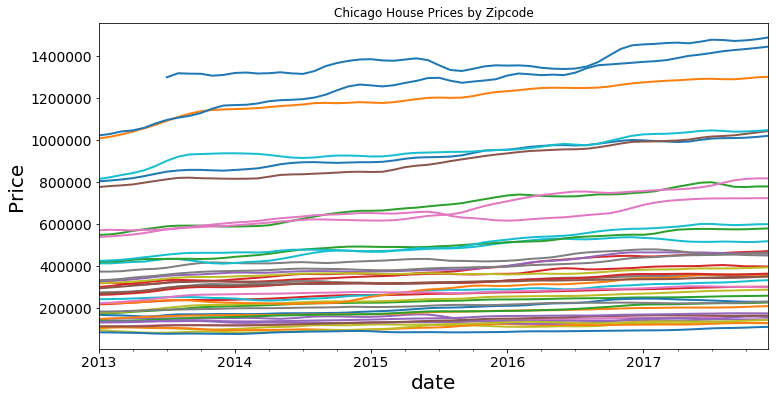

In [17]:
cat = zillow_chicago.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Chicago House Prices by Zipcode')
cat.legend().remove()


In [18]:
# cat = zillow_chicago['2014'].plot(figsize=(12,6), linewidth=2, fontsize=14)
# plt.xlabel('date', fontsize=20)
# plt.ylabel('Price', fontsize=20)
# plt.title('Chicago House Prices by Zipcode')
# cat.legend().remove()

From the previous plot, we can see there is no seasonality in the data.

In [19]:
# zillow_chicago.loc['2014',60657].plot()

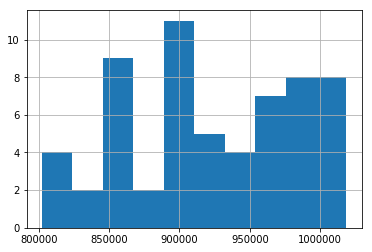

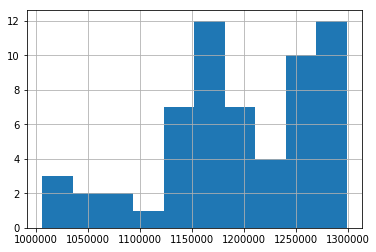

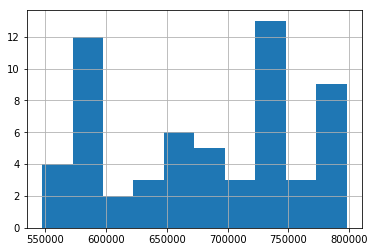

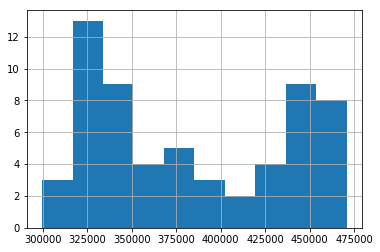

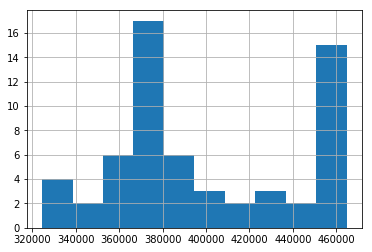

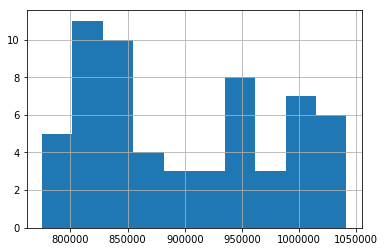

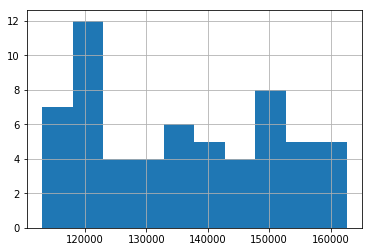

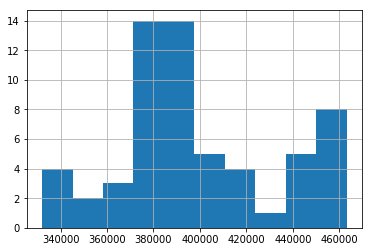

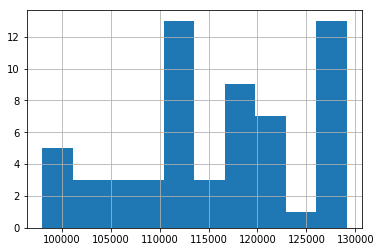

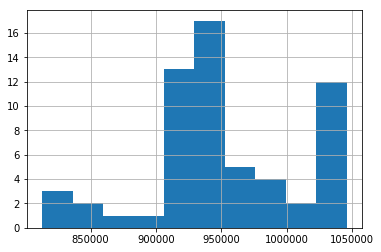

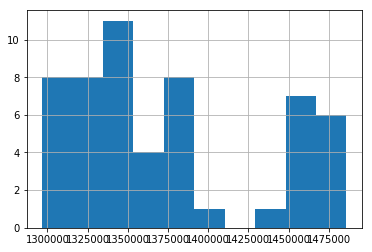

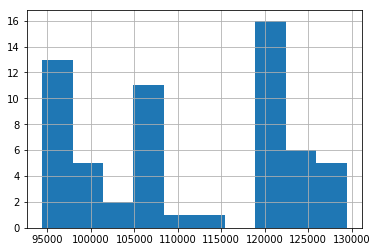

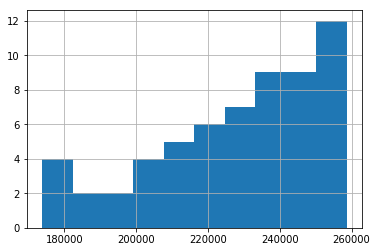

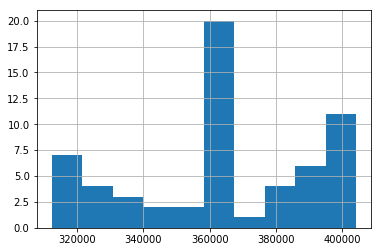

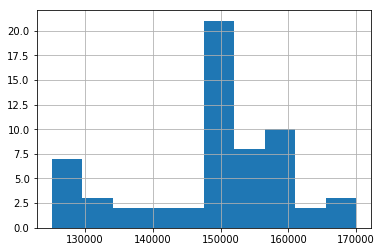

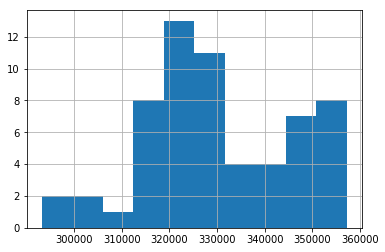

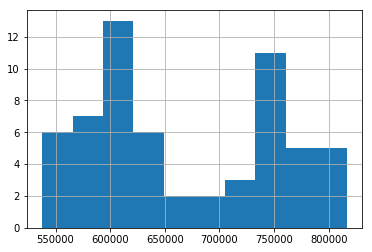

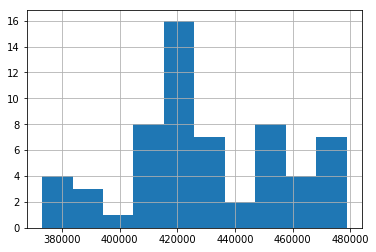

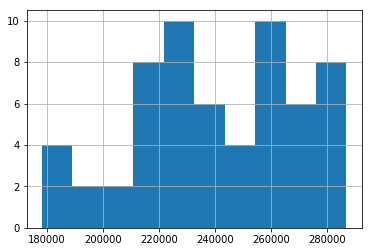

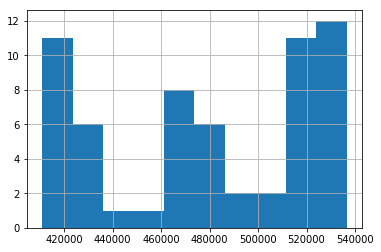

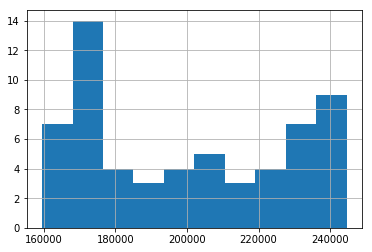

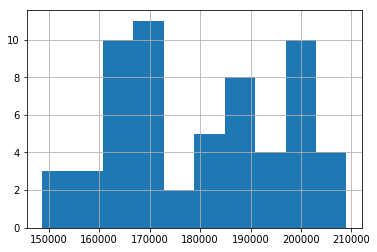

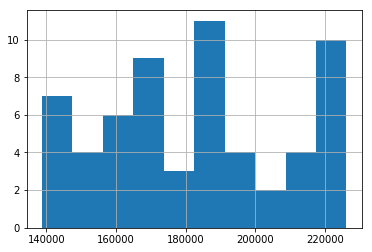

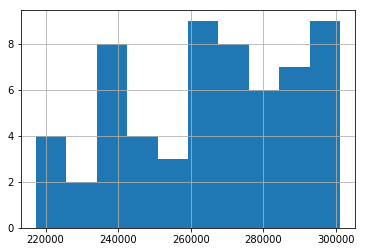

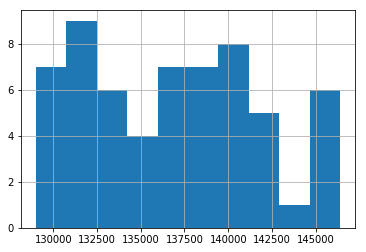

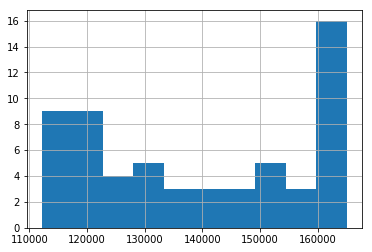

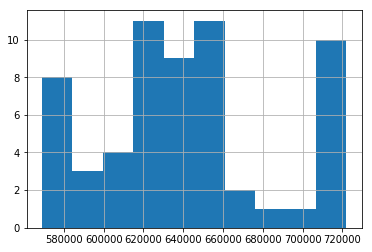

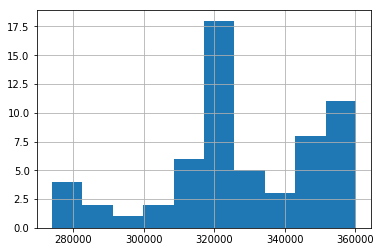

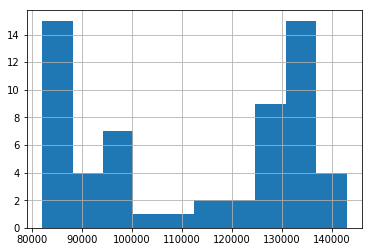

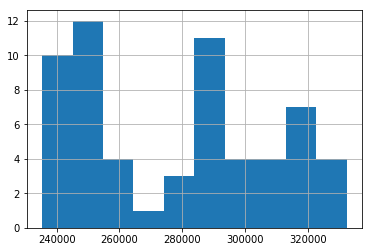

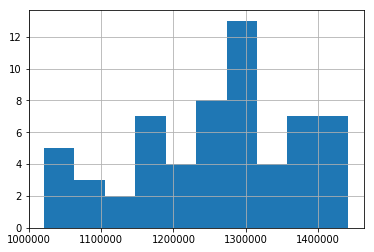

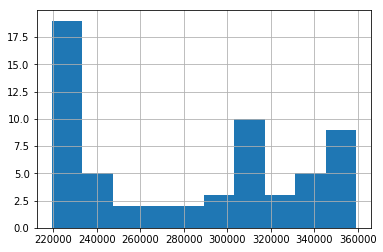

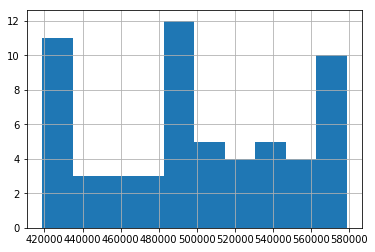

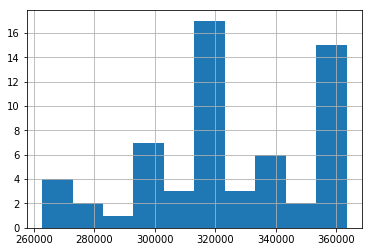

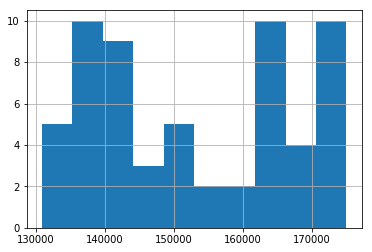

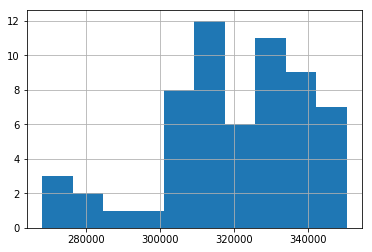

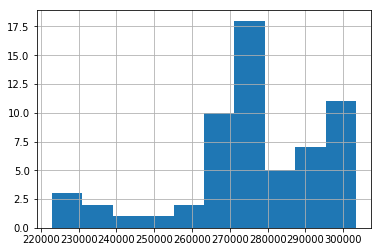

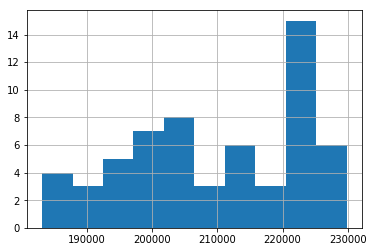

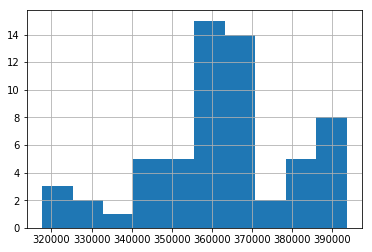

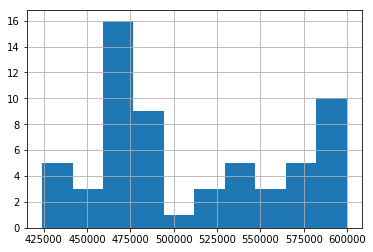

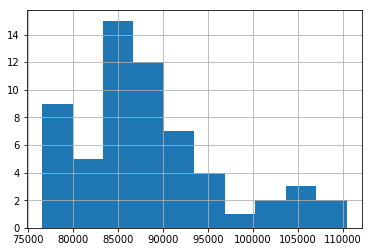

In [20]:
for zipcode in list(zillow_chicago.columns):
    zillow_chicago.loc[:,zipcode].hist()
    plt.show()
    
# price and count of where it spent the most time at which price point

In order to run analysis on the zipcode, we need to detrend our data from any trends associated with climate, season, etc. 

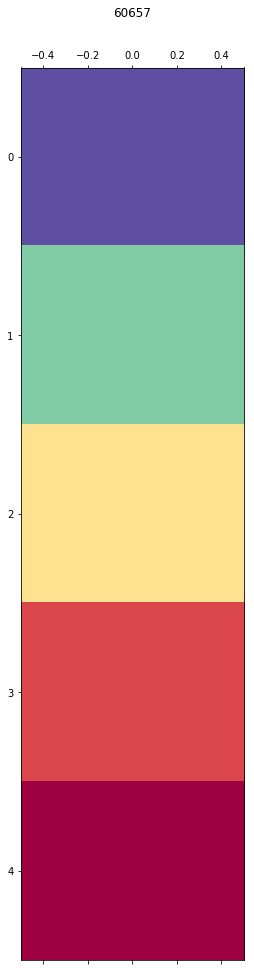

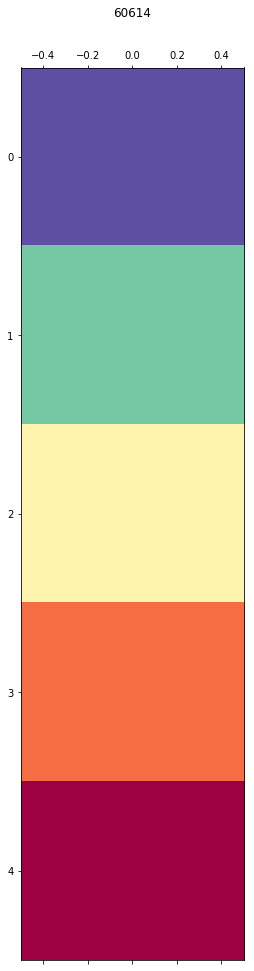

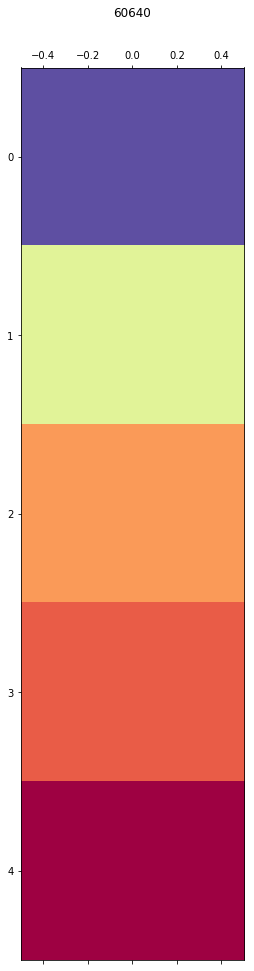

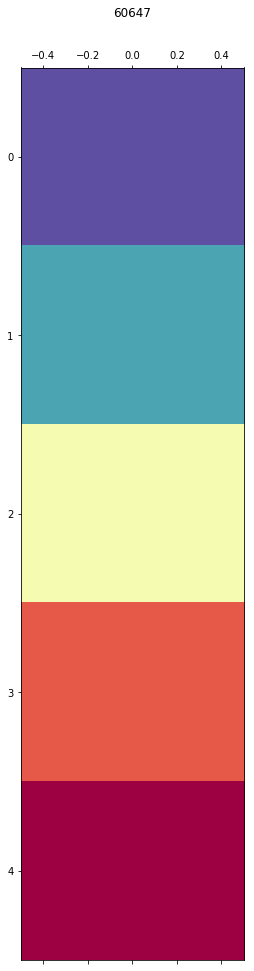

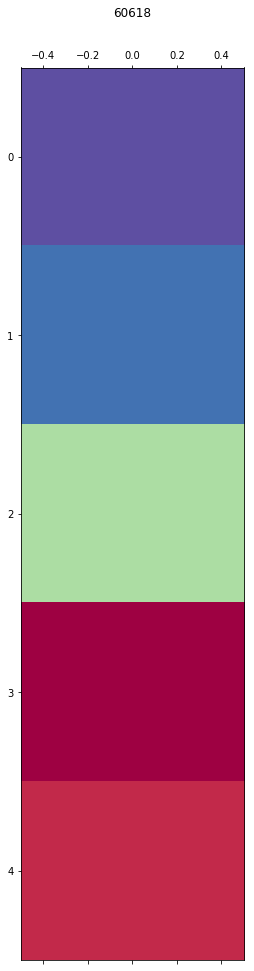

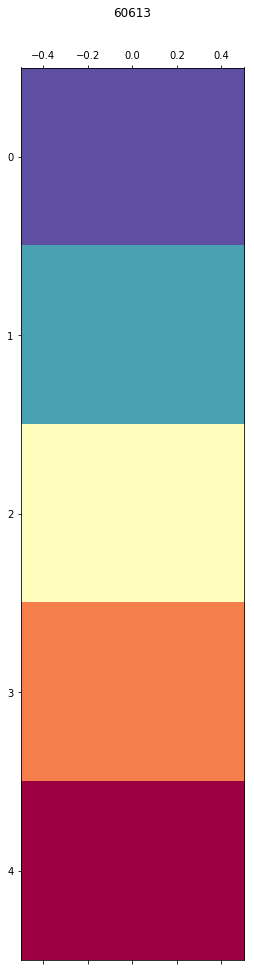

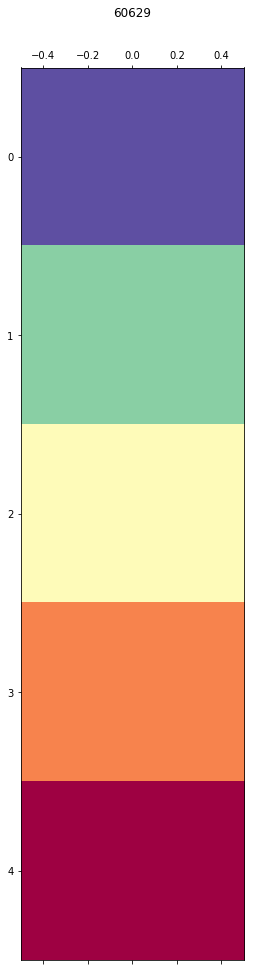

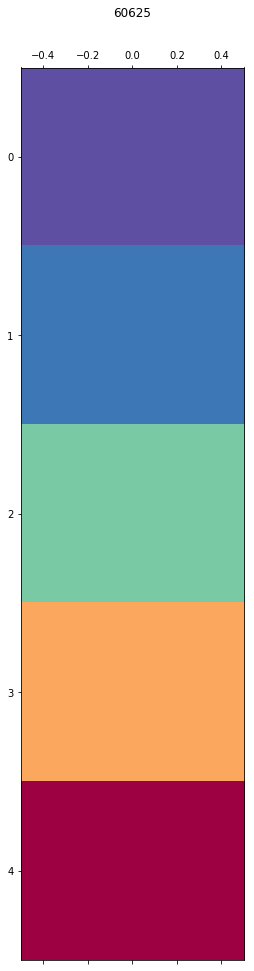

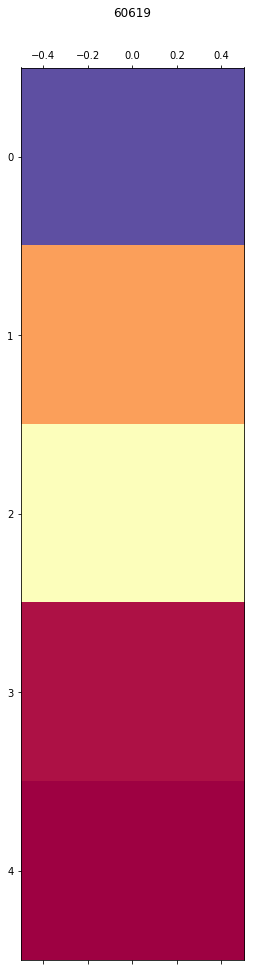

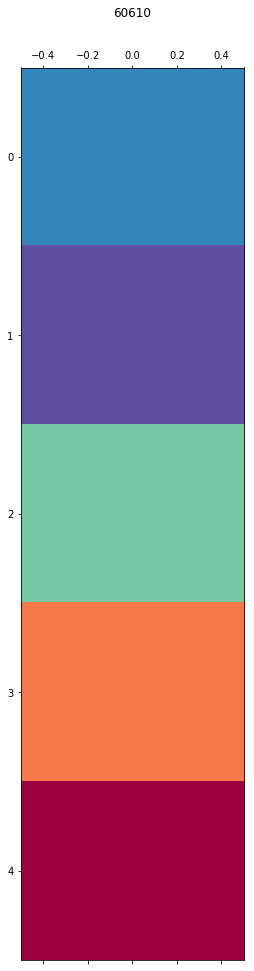

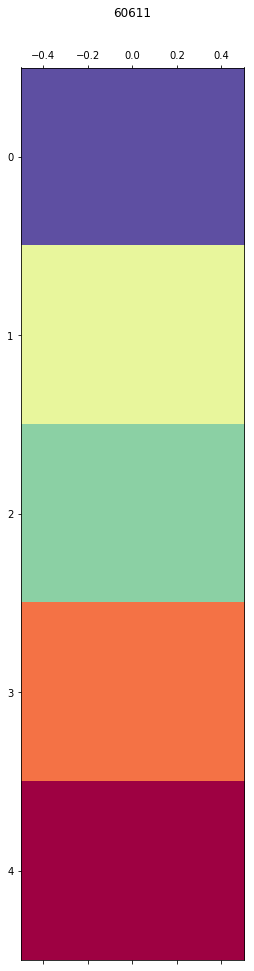

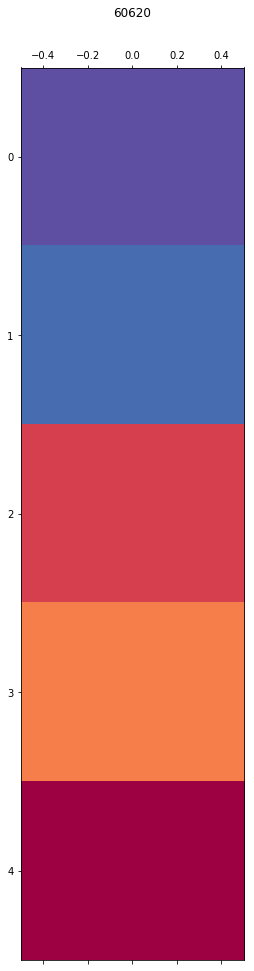

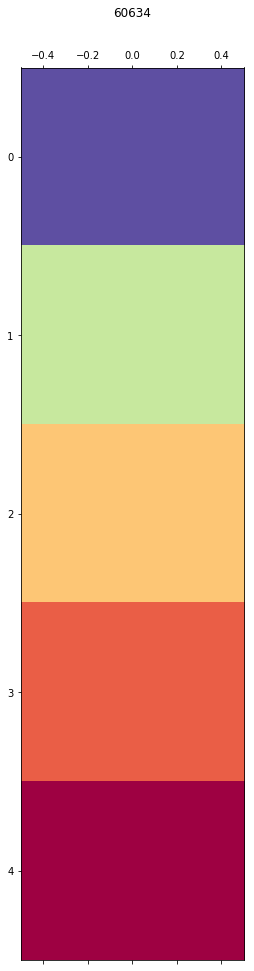

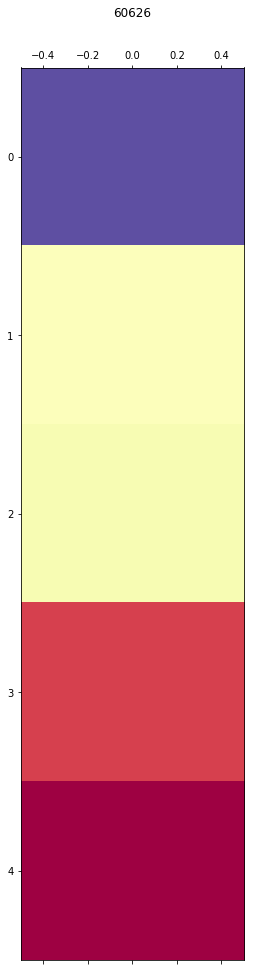

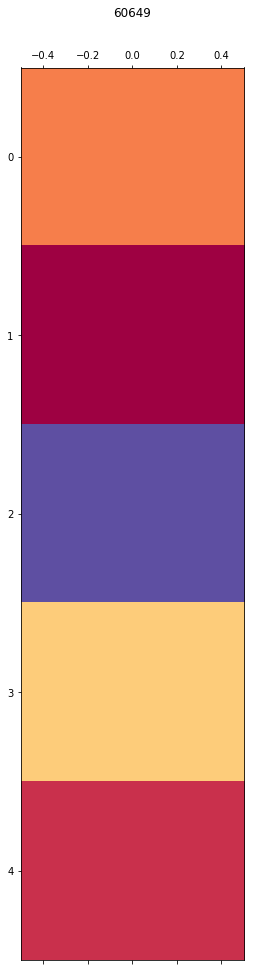

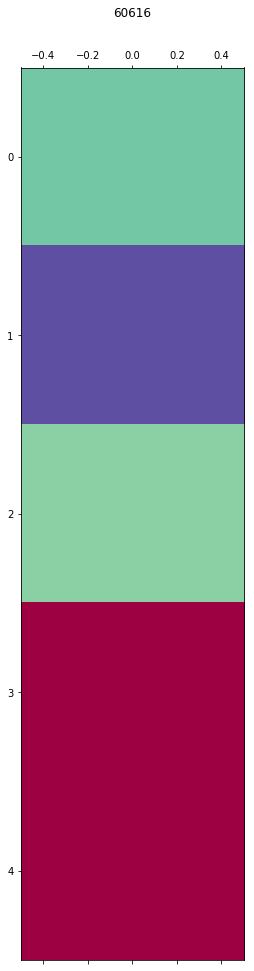

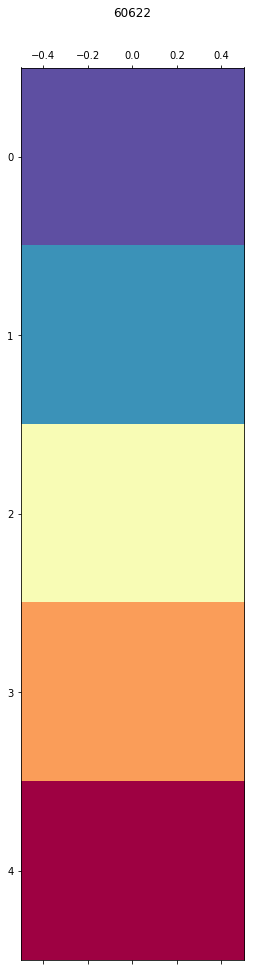

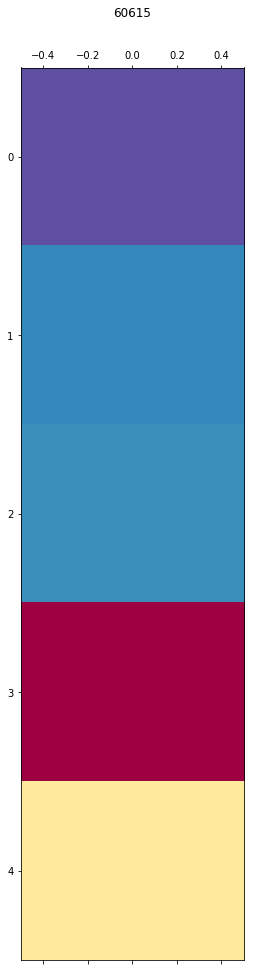

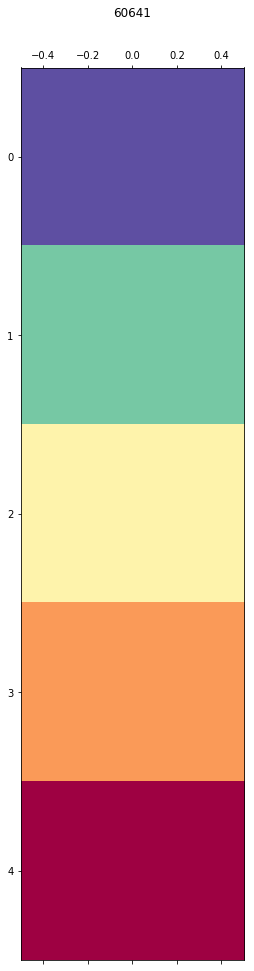

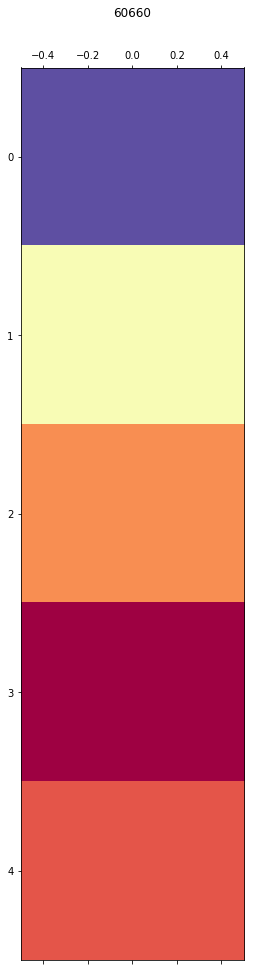

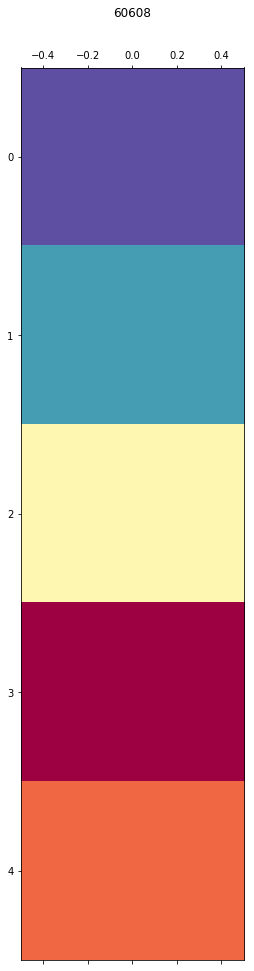

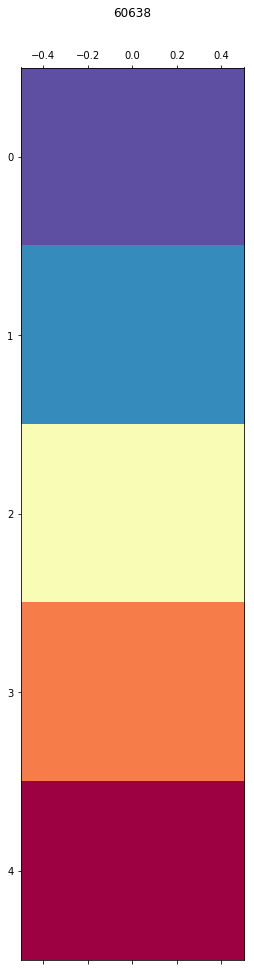

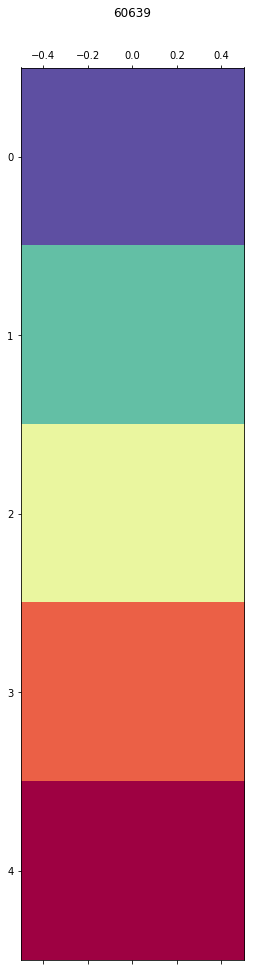

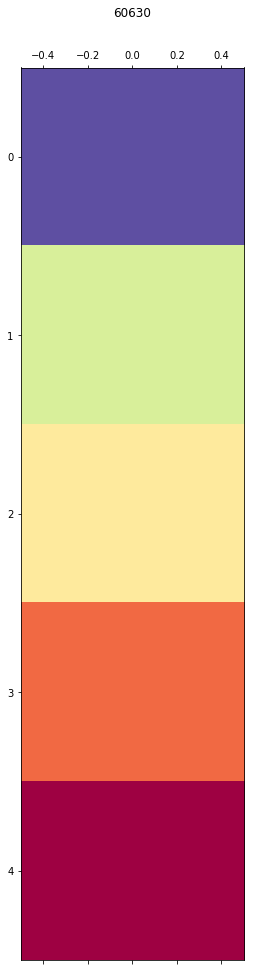

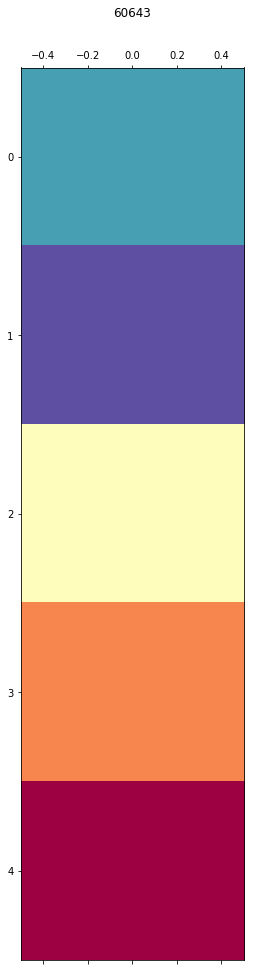

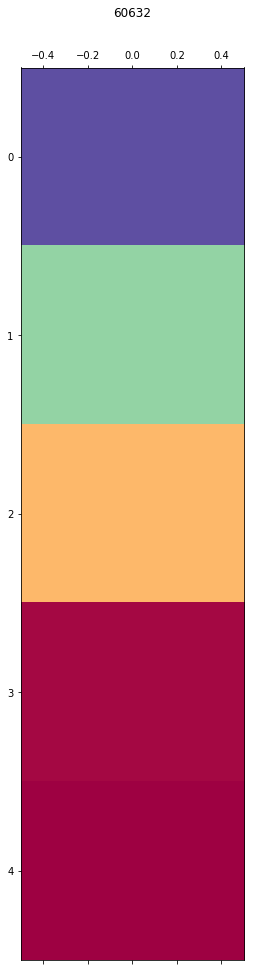

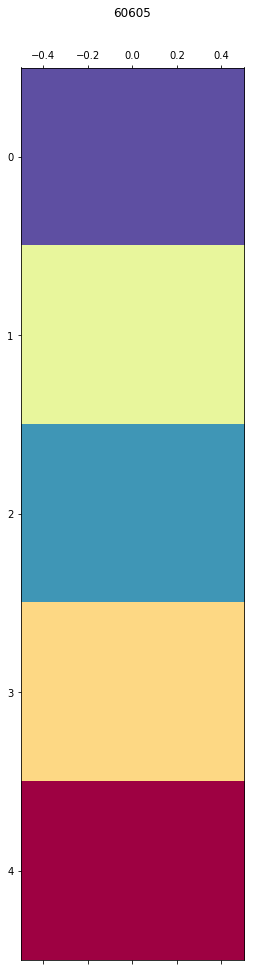

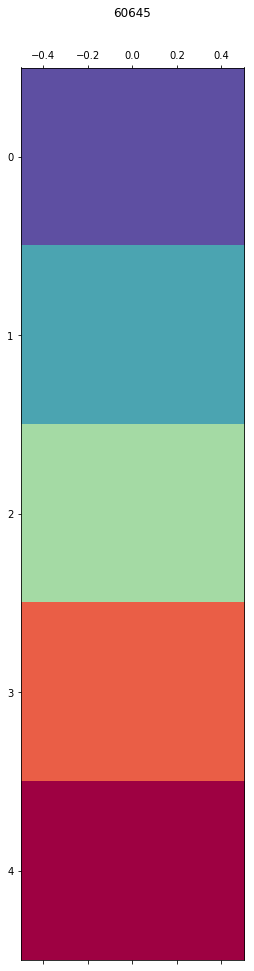

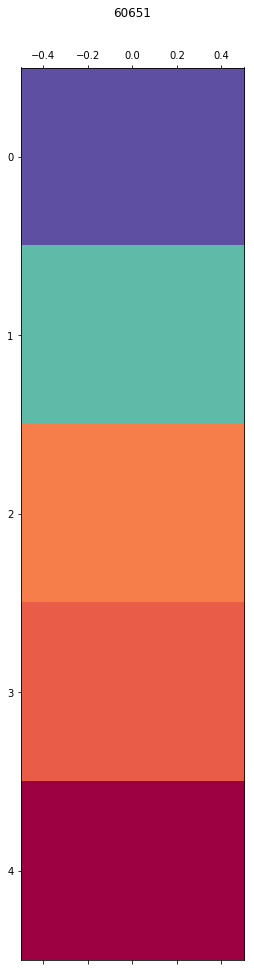

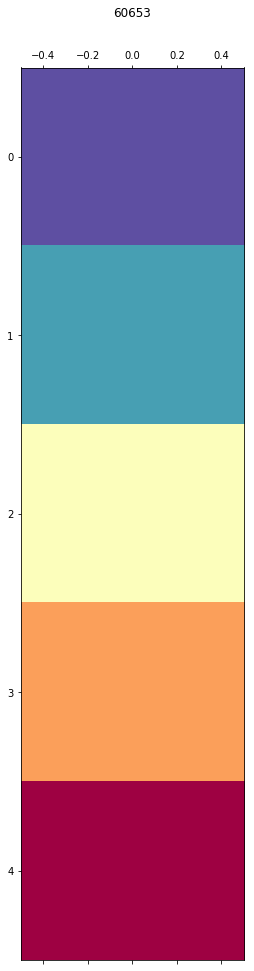

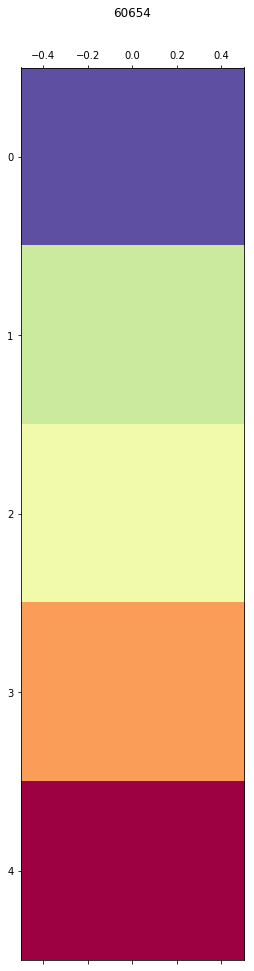

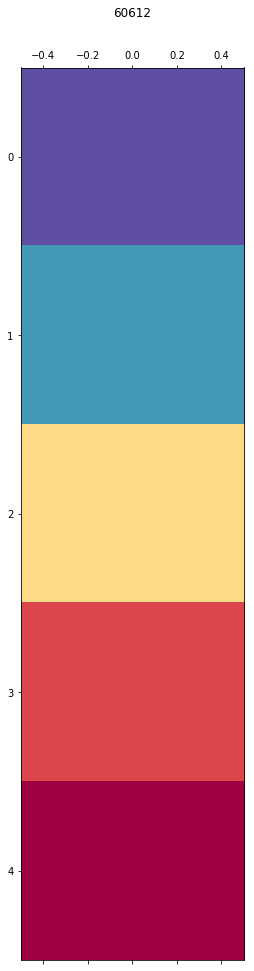

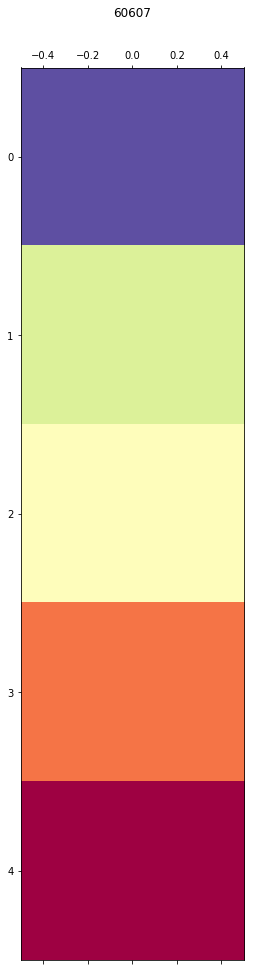

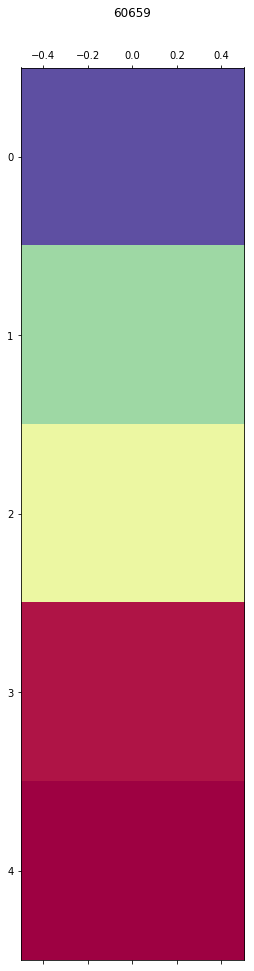

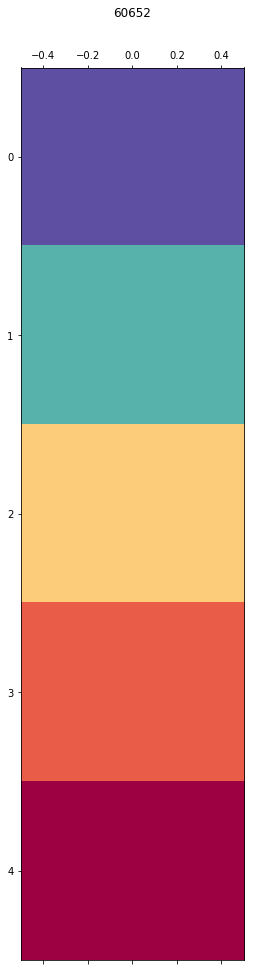

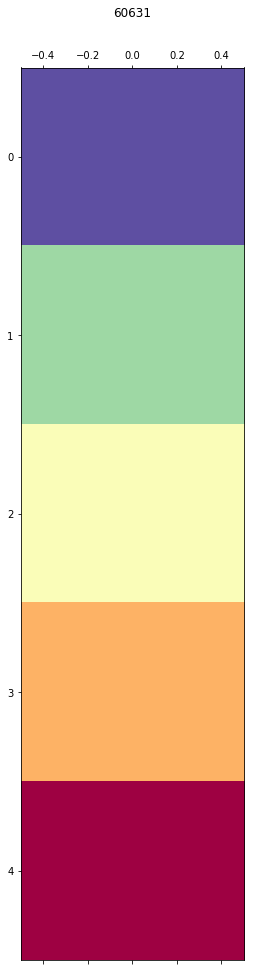

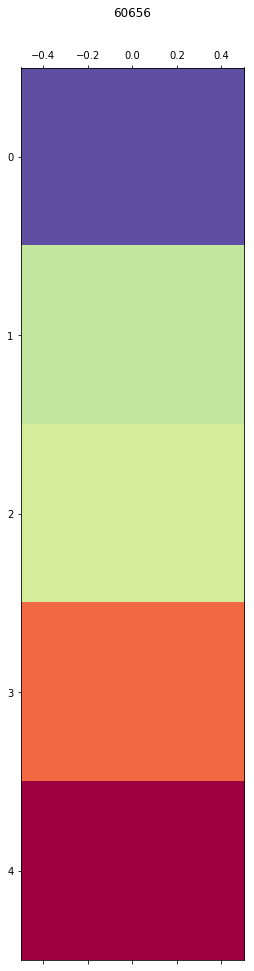

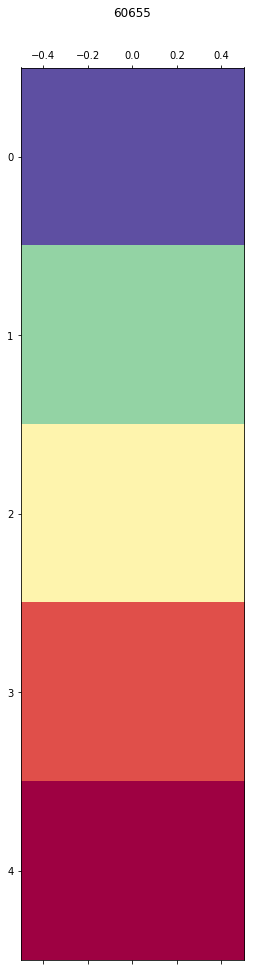

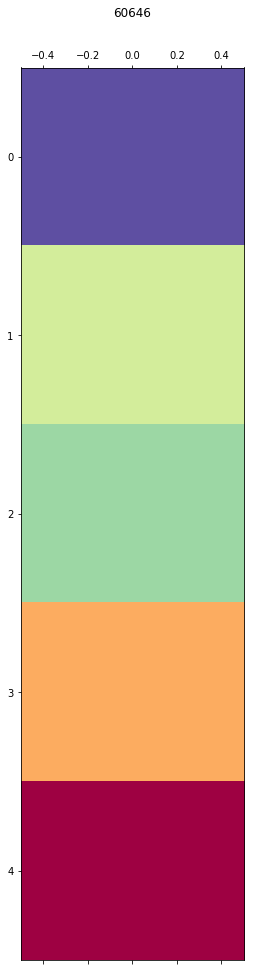

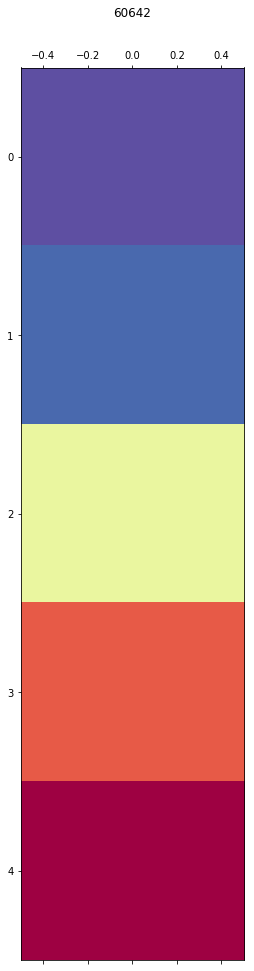

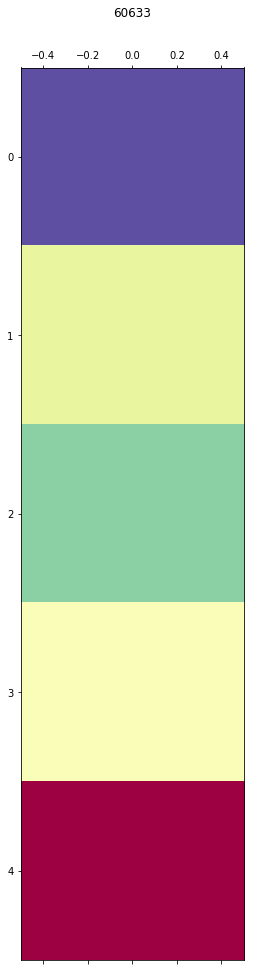

In [21]:
# Grouping data
for zipcode in list(zillow_chicago.columns):
    frequency = 'M' #string
    series = zillow_chicago[zipcode]
    frequency_groups = series.groupby(pd.Grouper(freq =frequency))
        # Plot grouped df
    df_annual = pd.DataFrame()  #creates blank df
    for yr, group in frequency_groups:
        df_annual[yr.year] = group.values.ravel()
        # Heatmaps
    year_matrix = df_annual.T #each row=1 year, each column=1 month
    plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
    plt.title('{}'.format(zipcode))
    plt.show()

# y-years
# x-time in months

From the rainbow plots above there is no visible seasonality in our data. 

### Rolling Mean

In [22]:
def stationarity_check(TS, column):
    '''Outputs a plot of the Rolling Mean & Standard Deviation and prints results of the Dickey-Fuller Test
      TS: Time Series, this is the dataframe from which you are pulling your information
      column: This is the column within the TS that you are interested in, e.g. the zipcode or stock ticker'''
    # Calculate rolling statistics
    rolmean = TS[column].rolling(window = 8, center = False).mean()
    rolstd = TS[column].rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column].dropna()) # change the passengers column as required
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS[column], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {}'.format(column))
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


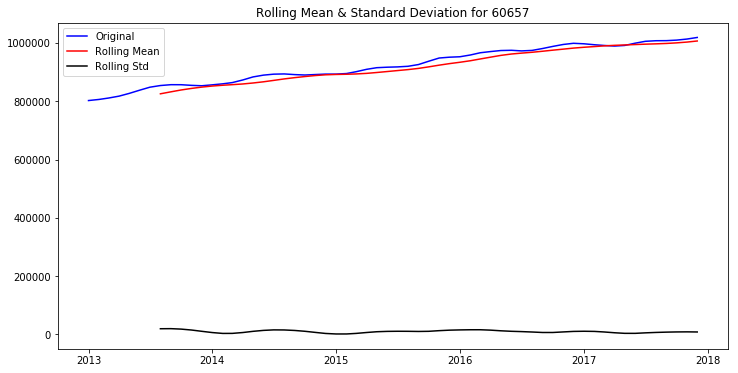

Results of Dickey-Fuller Test:
Test Statistic                 -0.554385
p-value                         0.880960
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


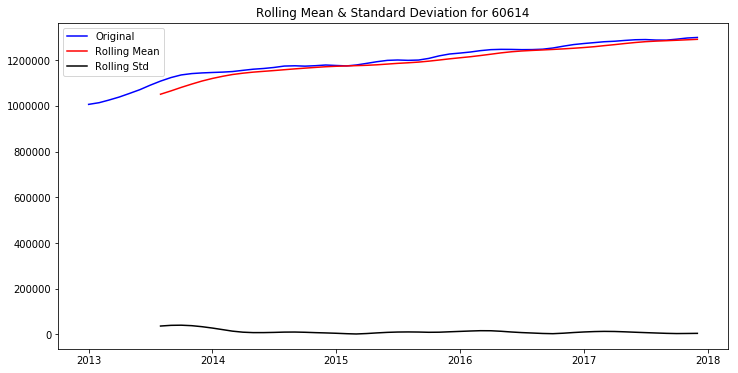

Results of Dickey-Fuller Test:
Test Statistic                 -2.092300
p-value                         0.247622
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


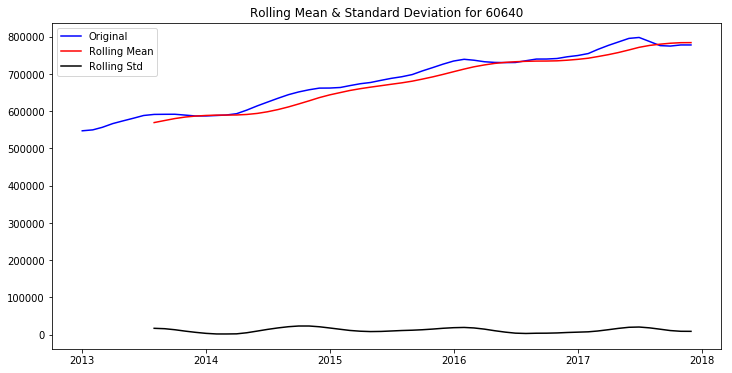

Results of Dickey-Fuller Test:
Test Statistic                 -1.659611
p-value                         0.452033
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


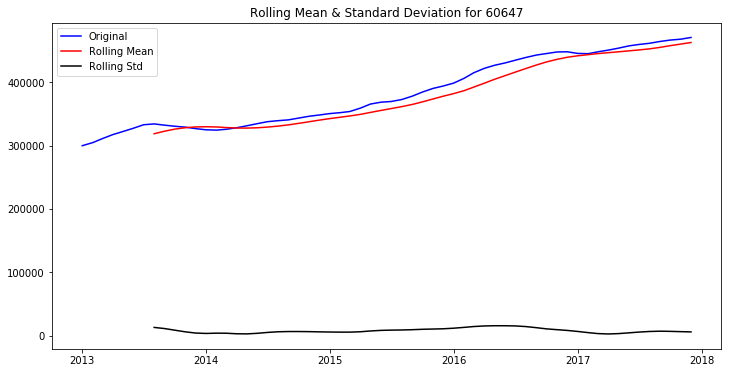

Results of Dickey-Fuller Test:
Test Statistic                  0.747417
p-value                         0.990738
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


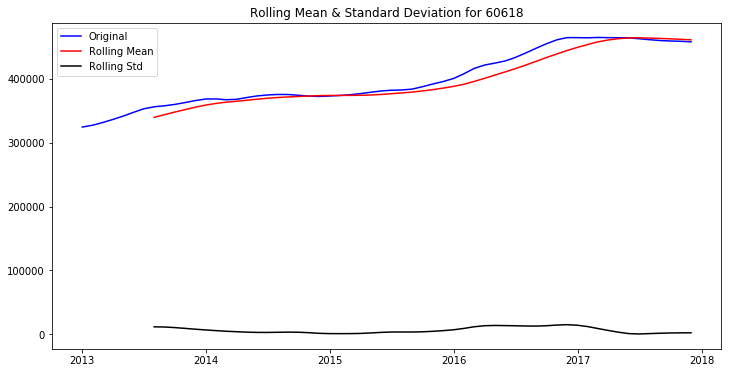

Results of Dickey-Fuller Test:
Test Statistic                 -0.649147
p-value                         0.859486
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


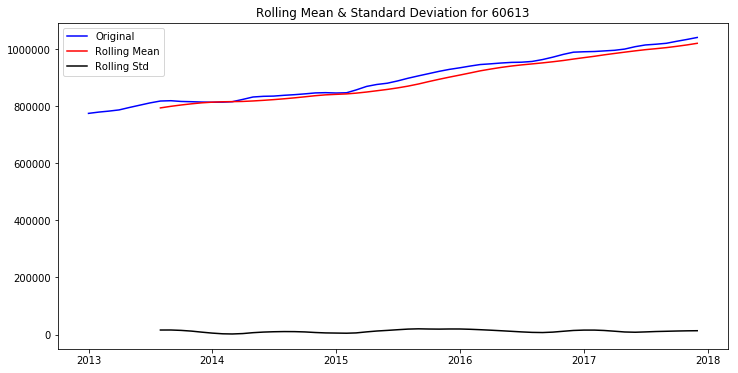

Results of Dickey-Fuller Test:
Test Statistic                  1.037762
p-value                         0.994649
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


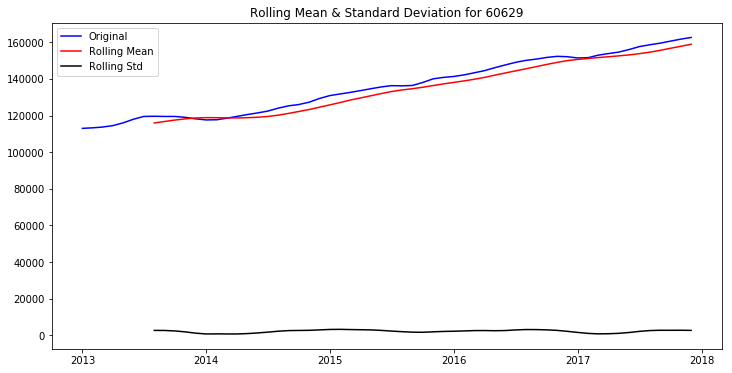

Results of Dickey-Fuller Test:
Test Statistic                  0.868340
p-value                         0.992663
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


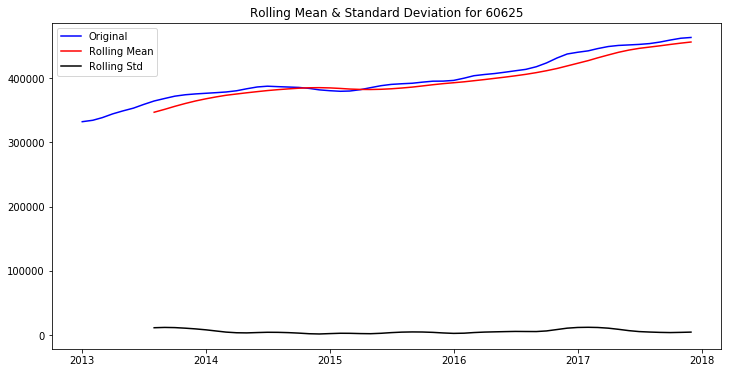

Results of Dickey-Fuller Test:
Test Statistic                 -0.259214
p-value                         0.931085
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


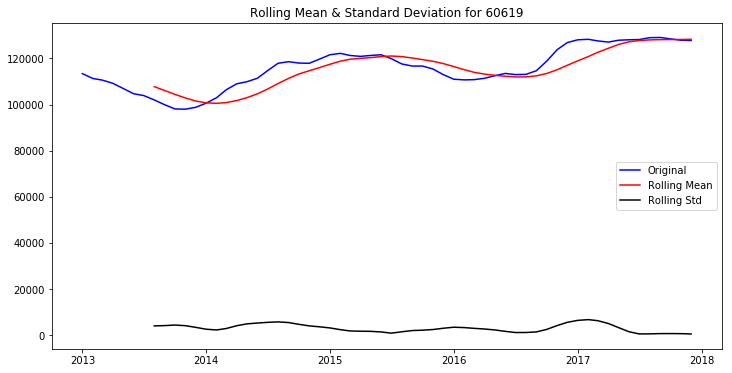

Results of Dickey-Fuller Test:
Test Statistic                 -2.195397
p-value                         0.207920
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


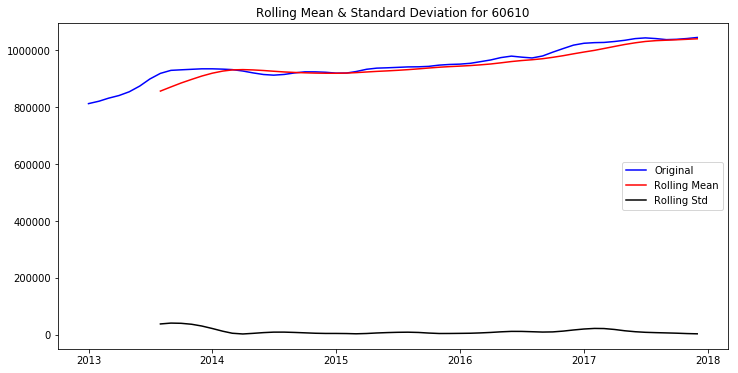

Results of Dickey-Fuller Test:
Test Statistic                  0.914549
p-value                         0.993277
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


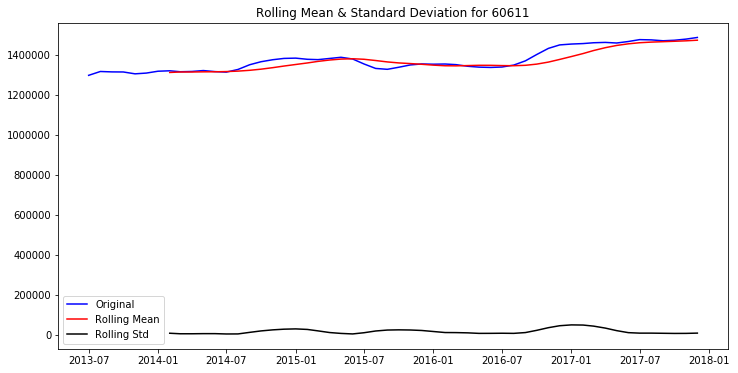

Results of Dickey-Fuller Test:
Test Statistic                 -0.860278
p-value                         0.800772
#Lags Used                      4.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


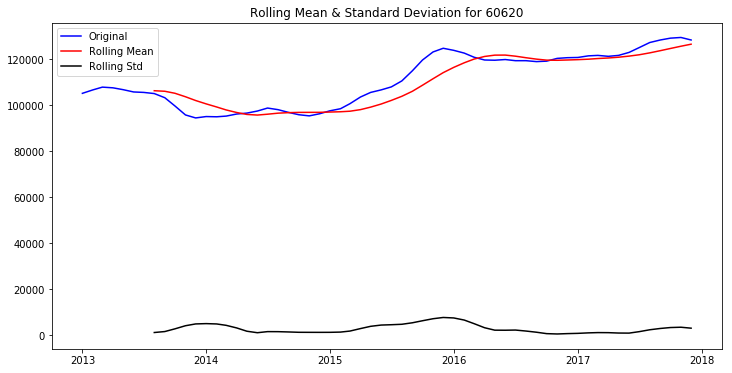

Results of Dickey-Fuller Test:
Test Statistic                 -1.008662
p-value                         0.750092
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


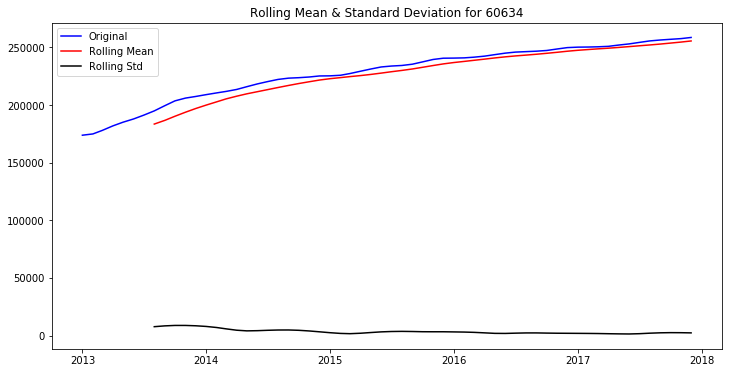

Results of Dickey-Fuller Test:
Test Statistic                 -3.434923
p-value                         0.009824
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


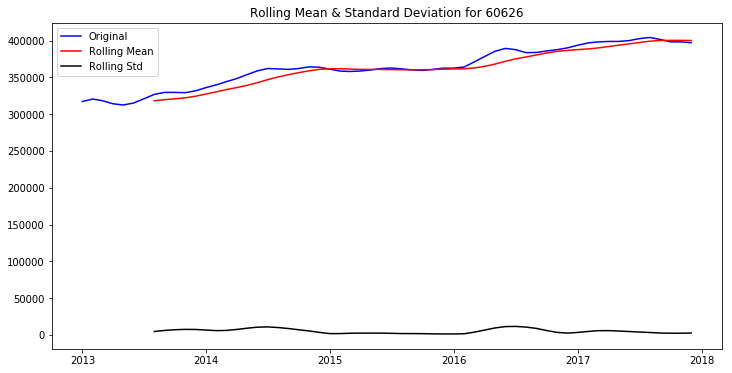

Results of Dickey-Fuller Test:
Test Statistic                 -2.164363
p-value                         0.219433
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


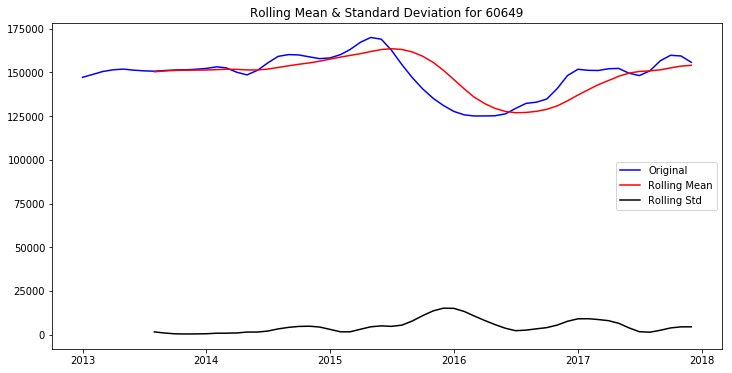

Results of Dickey-Fuller Test:
Test Statistic                 -2.974063
p-value                         0.037389
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


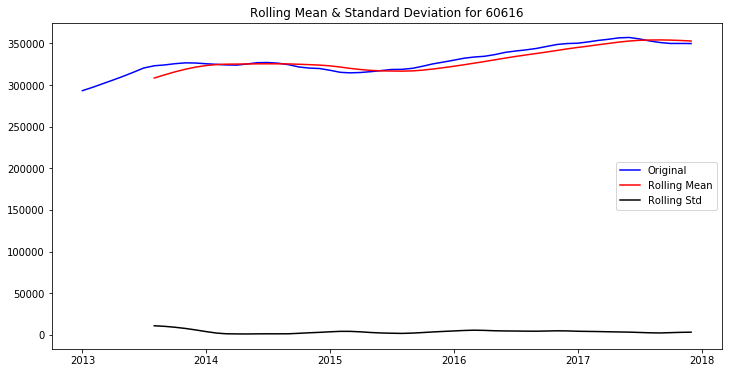

Results of Dickey-Fuller Test:
Test Statistic                 -0.740161
p-value                         0.836071
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


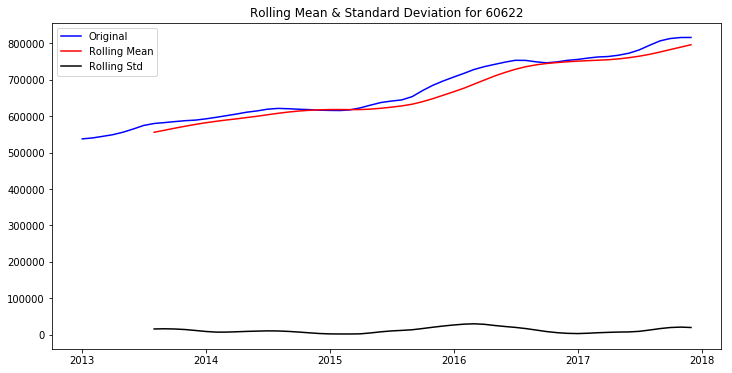

Results of Dickey-Fuller Test:
Test Statistic                  0.341163
p-value                         0.979156
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


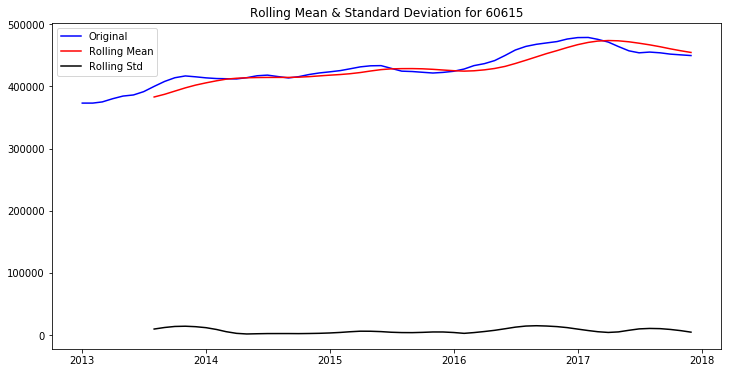

Results of Dickey-Fuller Test:
Test Statistic                 -1.866044
p-value                         0.348200
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


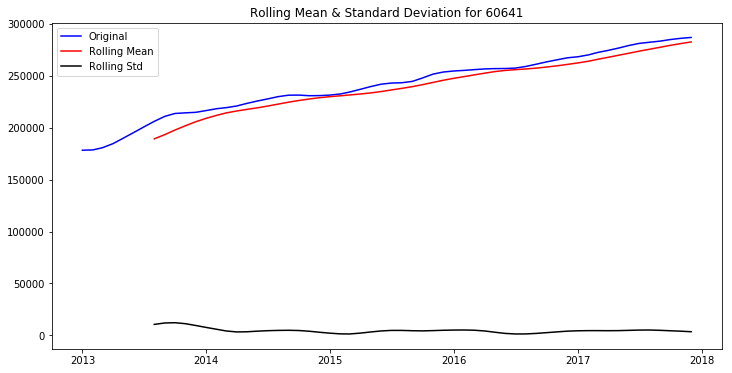

Results of Dickey-Fuller Test:
Test Statistic                 -1.493492
p-value                         0.536728
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


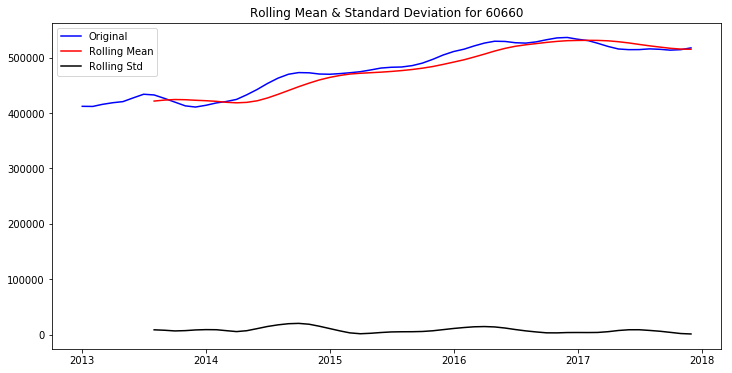

Results of Dickey-Fuller Test:
Test Statistic                 -1.325352
p-value                         0.617495
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


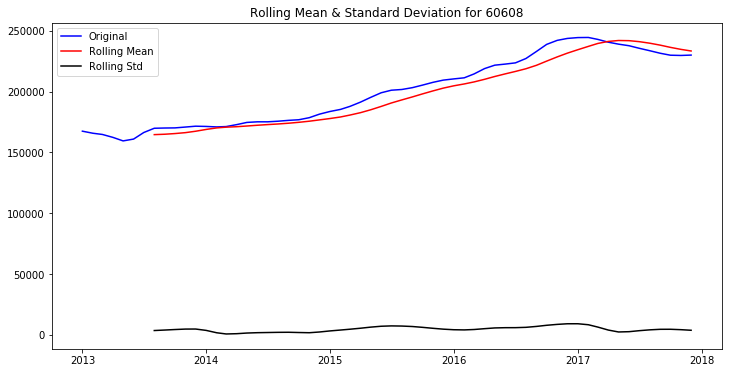

Results of Dickey-Fuller Test:
Test Statistic                 -2.147796
p-value                         0.225735
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


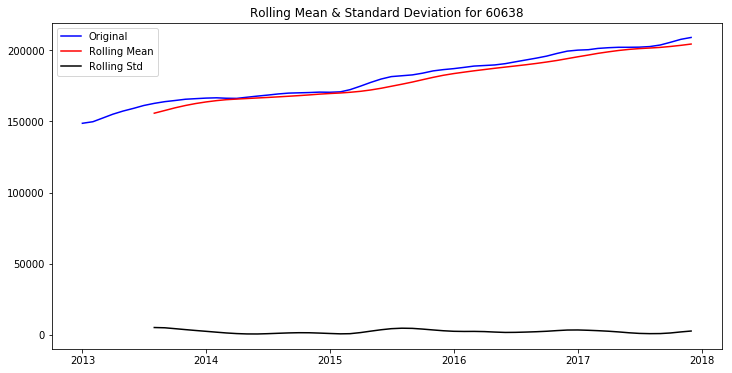

Results of Dickey-Fuller Test:
Test Statistic                  0.382304
p-value                         0.980821
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


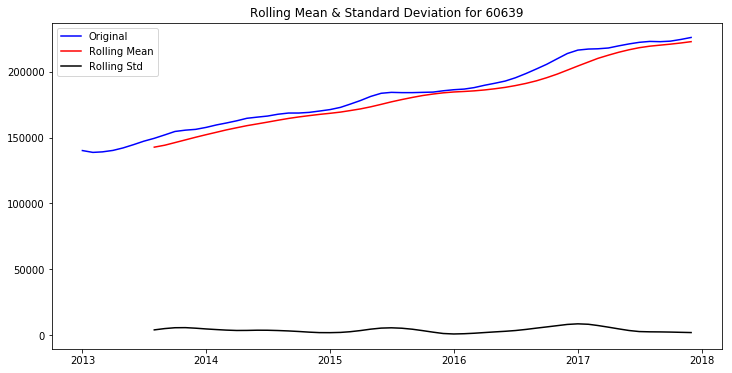

Results of Dickey-Fuller Test:
Test Statistic                  0.455833
p-value                         0.983467
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


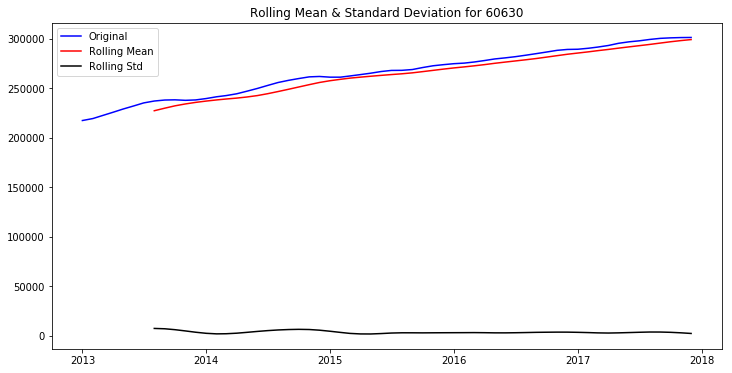

Results of Dickey-Fuller Test:
Test Statistic                 -2.444598
p-value                         0.129543
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


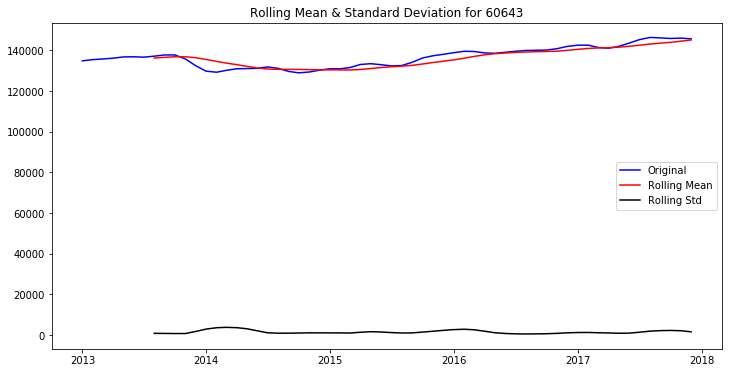

Results of Dickey-Fuller Test:
Test Statistic                 -0.897873
p-value                         0.788672
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


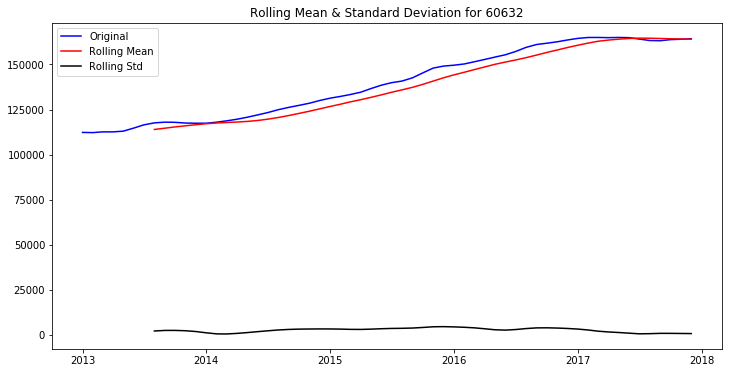

Results of Dickey-Fuller Test:
Test Statistic                 -0.464443
p-value                         0.898771
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


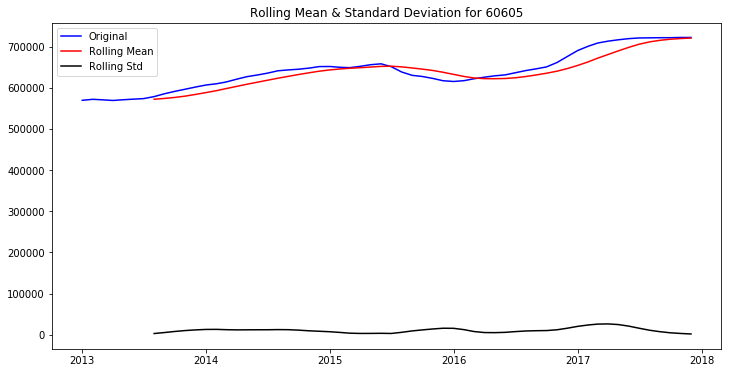

Results of Dickey-Fuller Test:
Test Statistic                 -1.912321
p-value                         0.326287
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


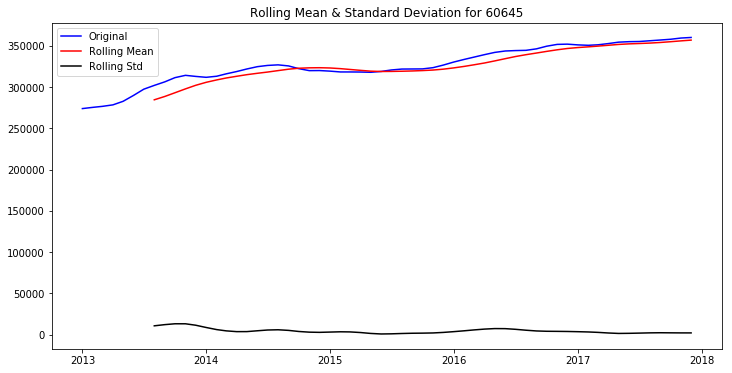

Results of Dickey-Fuller Test:
Test Statistic                 -0.979708
p-value                         0.760593
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


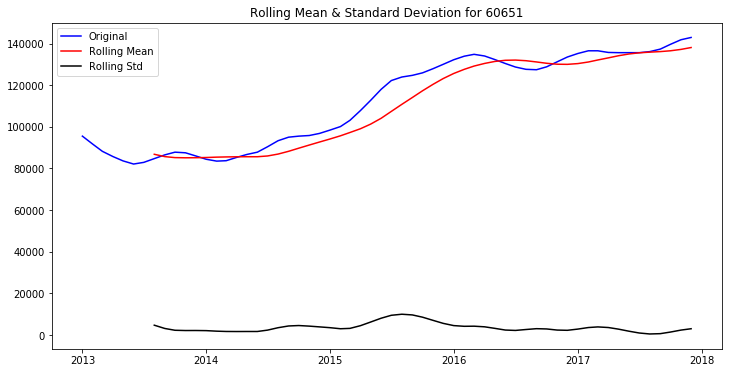

Results of Dickey-Fuller Test:
Test Statistic                 -1.151816
p-value                         0.693973
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


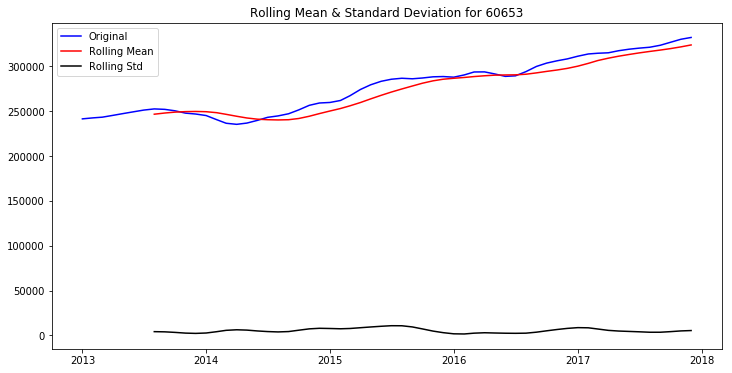

Results of Dickey-Fuller Test:
Test Statistic                  0.086587
p-value                         0.965133
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


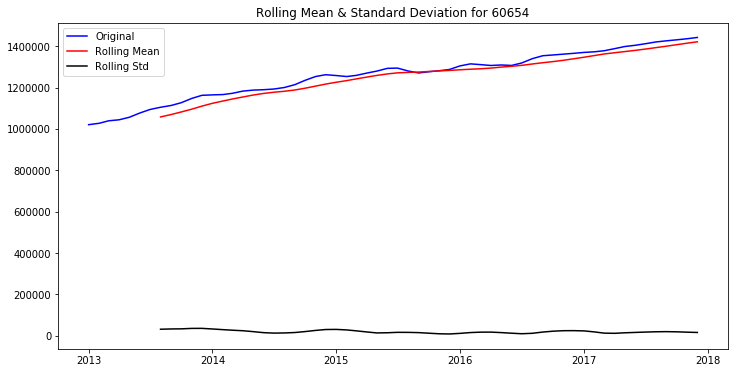

Results of Dickey-Fuller Test:
Test Statistic                 -1.116630
p-value                         0.708395
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


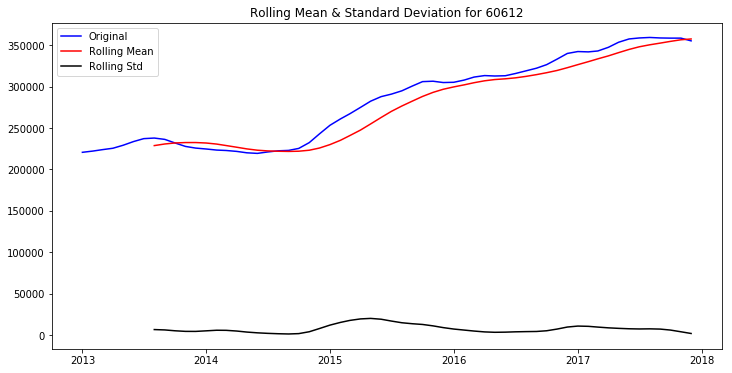

Results of Dickey-Fuller Test:
Test Statistic                 -0.960445
p-value                         0.767416
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


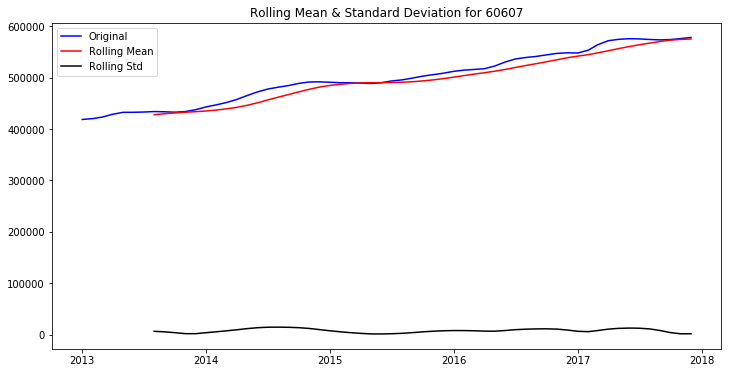

Results of Dickey-Fuller Test:
Test Statistic                 -1.012315
p-value                         0.748746
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


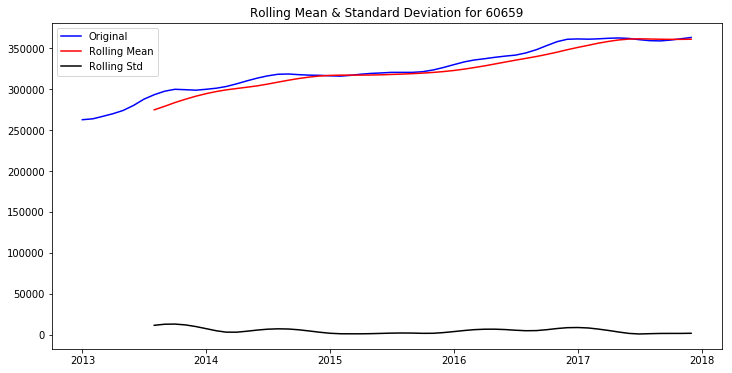

Results of Dickey-Fuller Test:
Test Statistic                 -0.940856
p-value                         0.774221
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


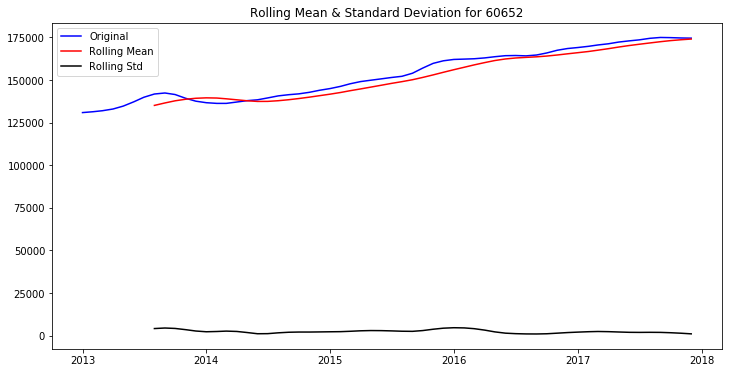

Results of Dickey-Fuller Test:
Test Statistic                 -0.060380
p-value                         0.953245
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


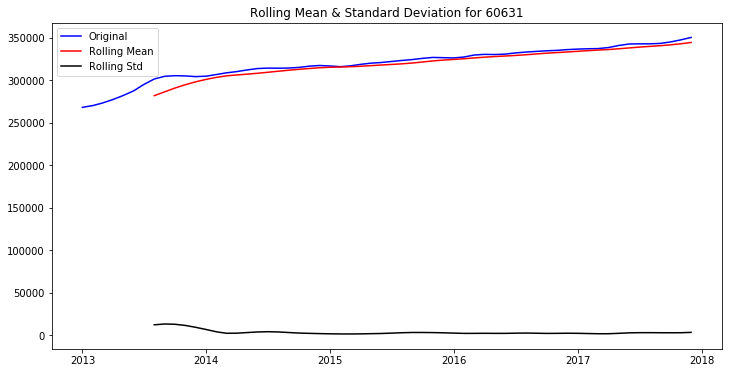

Results of Dickey-Fuller Test:
Test Statistic                  1.563617
p-value                         0.997744
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


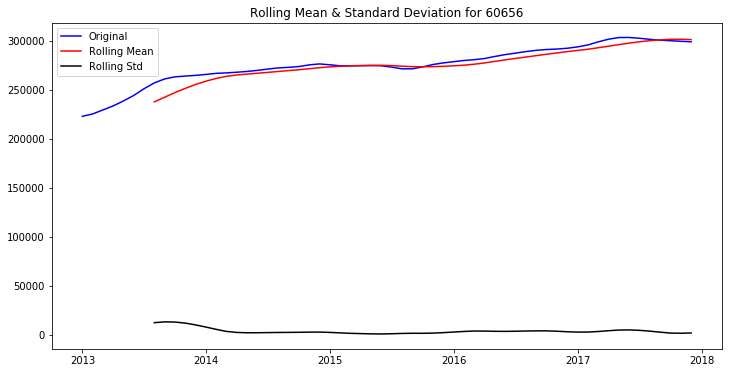

Results of Dickey-Fuller Test:
Test Statistic                 -0.691160
p-value                         0.849026
#Lags Used                      8.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


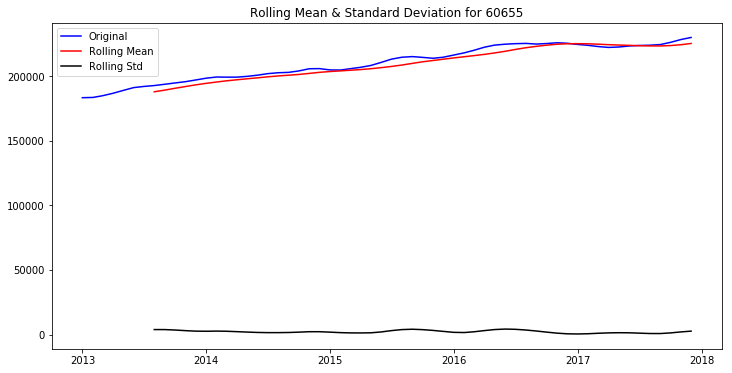

Results of Dickey-Fuller Test:
Test Statistic                 -1.299821
p-value                         0.629254
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


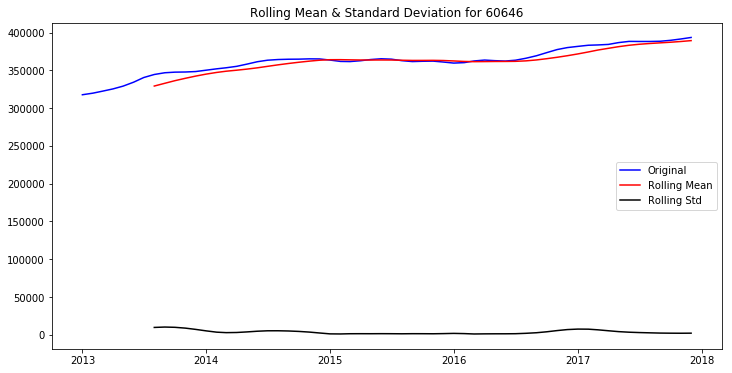

Results of Dickey-Fuller Test:
Test Statistic                 -0.310306
p-value                         0.924032
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


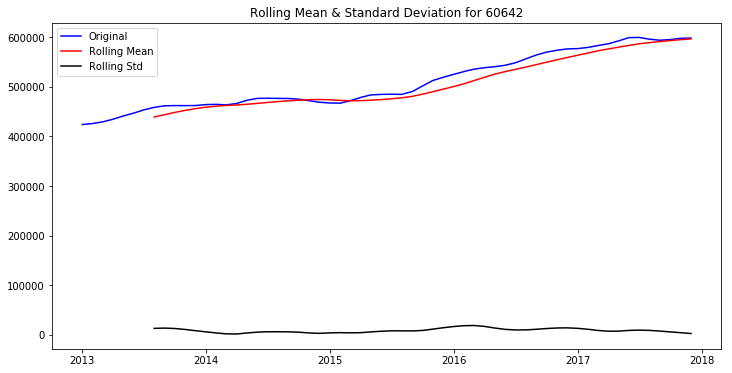

Results of Dickey-Fuller Test:
Test Statistic                 -0.396144
p-value                         0.910741
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


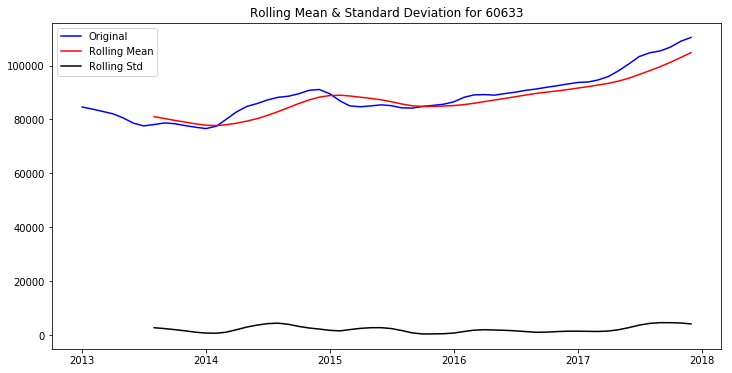

Results of Dickey-Fuller Test:
Test Statistic                  1.715147
p-value                         0.998165
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
[stationarity_check(zillow_chicago,x) for x in list(zillow_chicago.columns)]

Trend in the mean, variance is fairly close to zero and is constant. 

## Removing trend and seasonality

In [81]:
# downsample from monthly to quarter 

chicago_q = zillow_chicago.resample('QS').median()  # This will change it to quarterly

In [128]:
def detrend(TS, alpha=0.05):
    
    '''Selecting the best method for detrending timeseries based on 
        lowest p-value of the augmented Dickey-Fuller.
        TS: timeseries dataframe
        alpha: alpha value for Dickey-Fuller '''
    
    plist = []
    for column in list(TS.columns):

        p_values = []
        if column==60611:
            pass
        else:

            decomposition=seasonal_decompose(TS[column].dropna())
            residuals = decomposition.resid
            dftest = adfuller(residuals.dropna(),maxlag=4)
            dfoutput1 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
            for key, value in dftest[4].items():
                dfoutput1['Critical Values (%s)' %key] = value
            p_values.append(dfoutput1[1])


            data_diff1 = TS[column].diff(periods=1)
            dftest = adfuller(data_diff1.dropna(),maxlag=4)
            dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
            for key, value in dftest[4].items():
                dfoutput2['Critical Values (%s)' %key] = value
            p_values.append(dfoutput2[1])

            data_diff2 = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
            dftest = adfuller(data_diff2.dropna(),maxlag=4)
            dfoutput3 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
            for key, value in dftest[4].items():
                dfoutput3['Critical Values (%s)' %key] = value
            p_values.append(dfoutput3[1])


            temp_diff = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
            data_diff3 = temp_diff - temp_diff.shift(12)  
            dftest = adfuller(data_diff3.dropna(),maxlag=4)
            dfoutput4 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
            for key, value in dftest[4].items():
                dfoutput4['Critical Values (%s)' %key] = value
            p_values.append(dfoutput4[1])

            if np.argmin(p_values)==0:
                residuals.plot(figsize=(20,6))
                plt.title('{} Seasonal Decomposition'.format(column))
                plt.show();
                print(dfoutput1)

            elif np.argmin(p_values)==1:
                data_diff1.plot(figsize=(20,6))
                plt.title('{} First Difference'.format(column))
                plt.show();
                print(dfoutput2)

            elif np.argmin(p_values)==2:
                data_diff1.plot(figsize=(20,6))
                plt.title('{} Log First Difference'.format(column))
                plt.show();
                print(dfoutput3)

            elif np.argmin(p_values)==3:
                data_diff1.plot(figsize=(20,6))
                plt.title('{} Log Seasonal First Difference'.format(column))
                plt.show();
                print(dfoutput4)

            plist.append(min(p_values))
    print('\n','The p-value above {}:'.format(alpha),(np.array(plist)>alpha).sum())
  
    

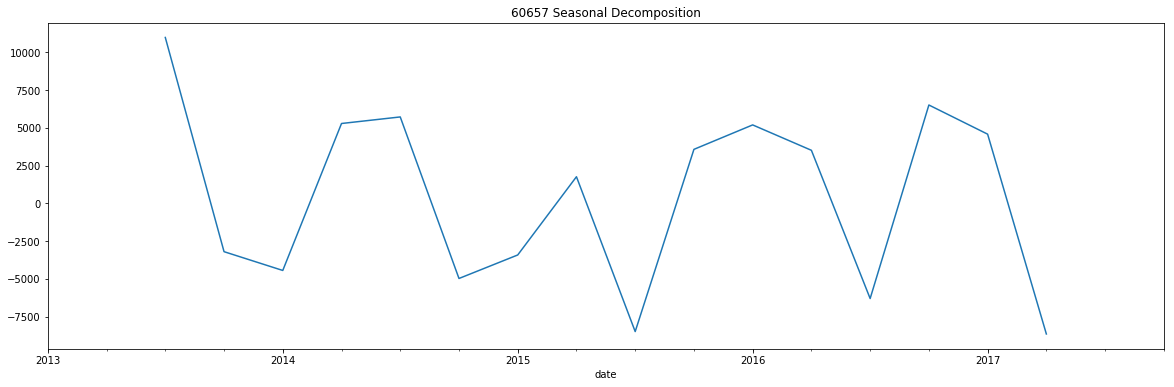

Test Statistic                 -5.086824
p-value                         0.000015
#Lags Used                      1.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


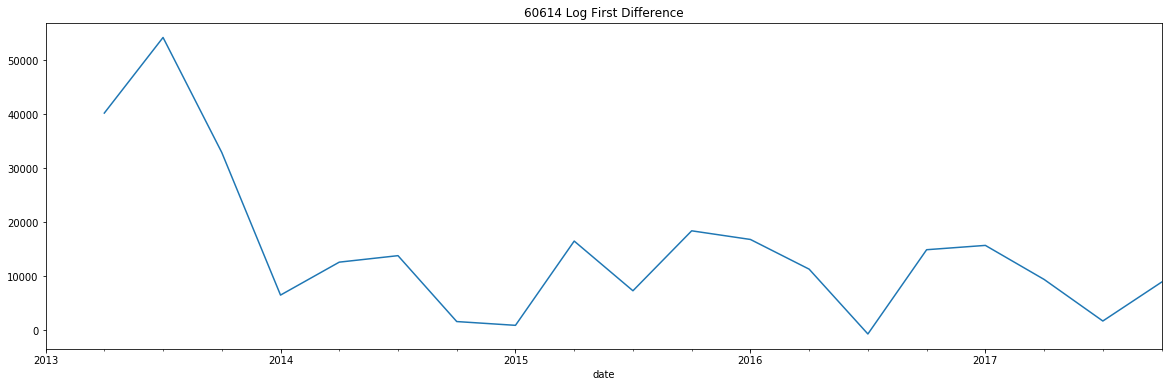

Test Statistic                 -5.268042
p-value                         0.000006
#Lags Used                      1.000000
Number of Observations Used    17.000000
Critical Values (1%)           -3.889266
Critical Values (5%)           -3.054358
Critical Values (10%)          -2.666984
dtype: float64


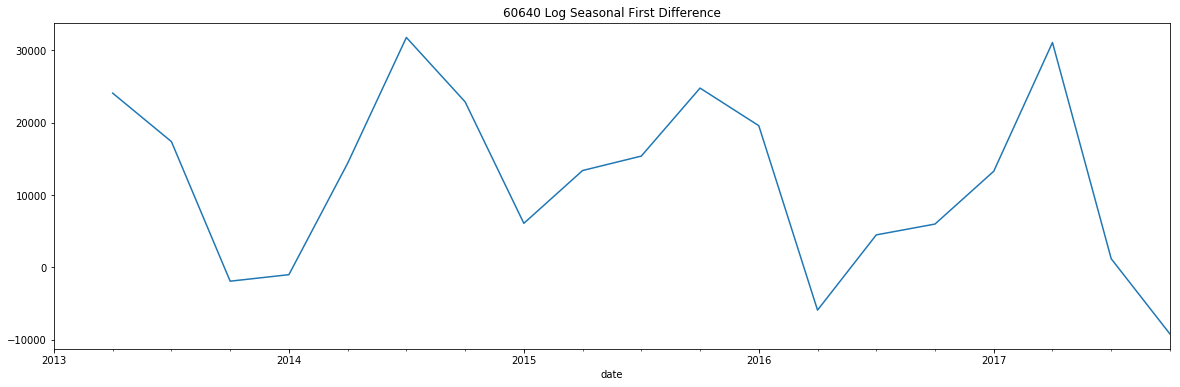

Test Statistic                -1.378395
p-value                        0.592589
#Lags Used                     0.000000
Number of Observations Used    6.000000
Critical Values (1%)          -5.354256
Critical Values (5%)          -3.646238
Critical Values (10%)         -2.901198
dtype: float64


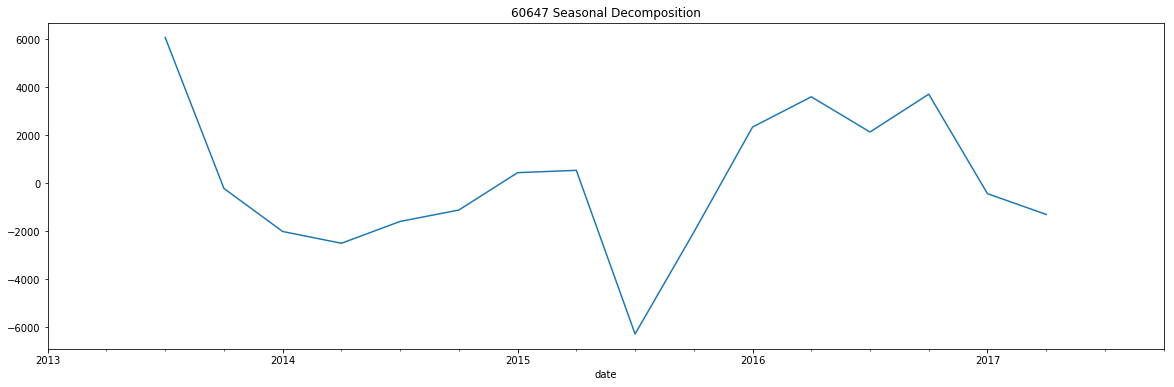

Test Statistic                 -3.198701
p-value                         0.020060
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


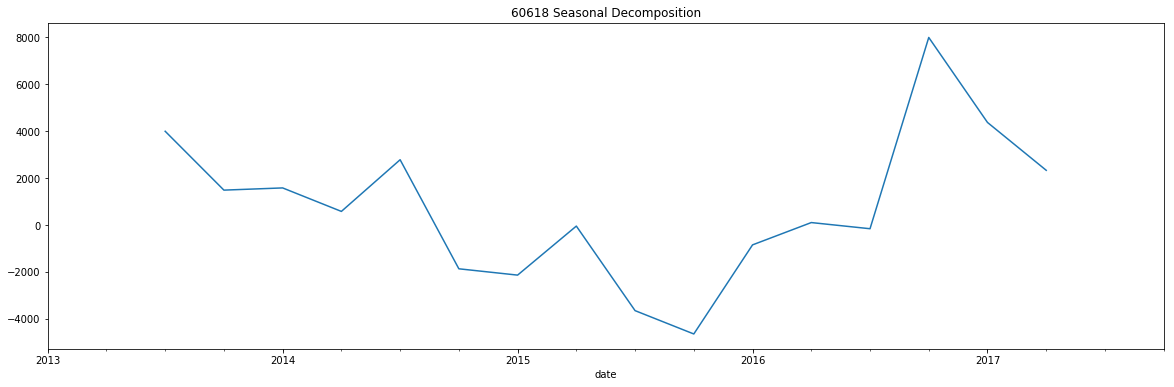

Test Statistic                 -3.887234
p-value                         0.002131
#Lags Used                      4.000000
Number of Observations Used    11.000000
Critical Values (1%)           -4.223238
Critical Values (5%)           -3.189369
Critical Values (10%)          -2.729839
dtype: float64


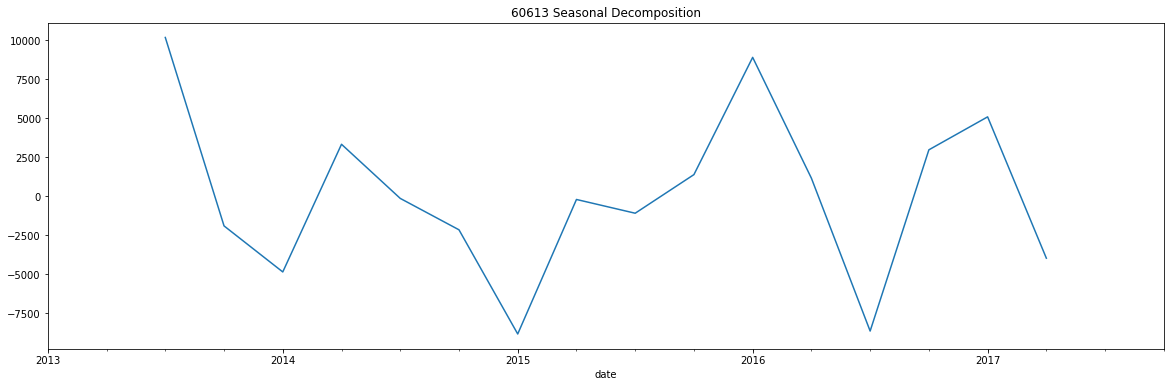

Test Statistic                 -4.323888
p-value                         0.000404
#Lags Used                      1.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


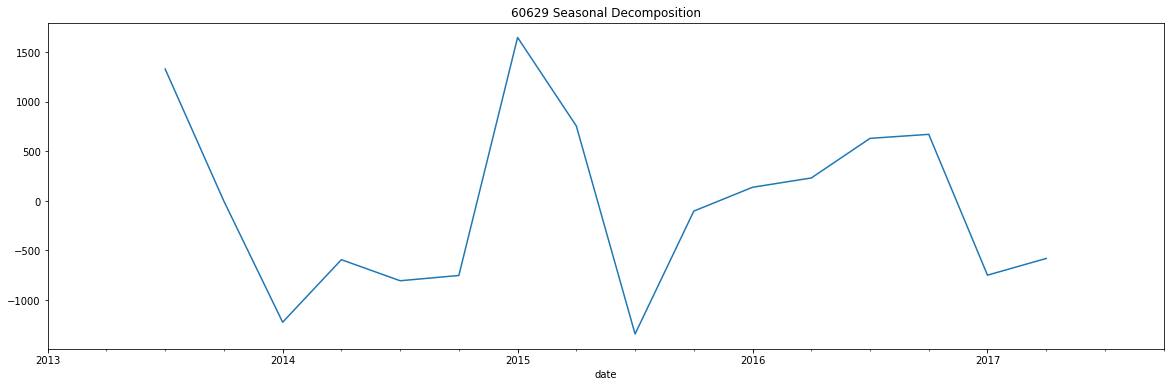

Test Statistic                 -3.713759
p-value                         0.003924
#Lags Used                      3.000000
Number of Observations Used    12.000000
Critical Values (1%)           -4.137829
Critical Values (5%)           -3.154972
Critical Values (10%)          -2.714477
dtype: float64


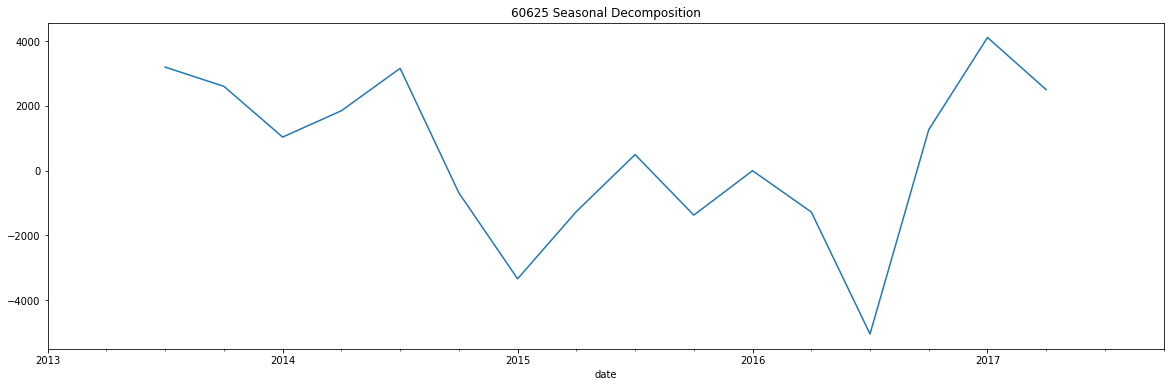

Test Statistic                 -2.826071
p-value                         0.054645
#Lags Used                      1.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


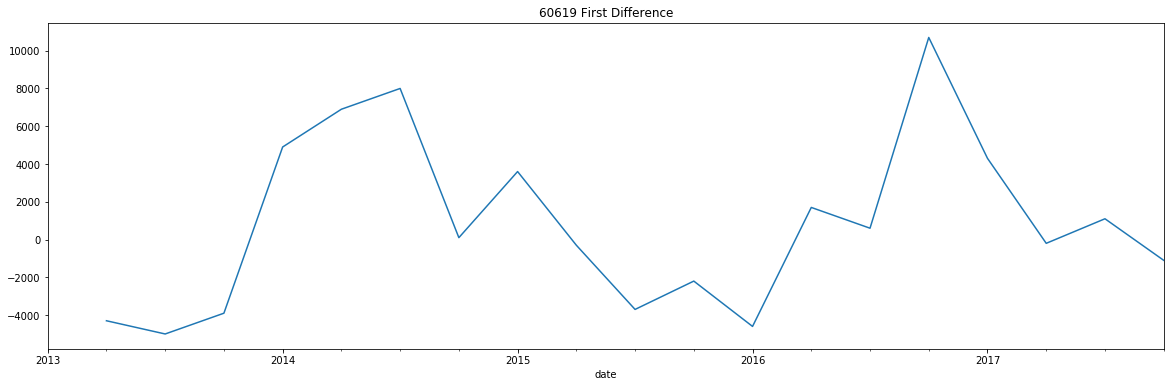

Test Statistic                 -2.674034
p-value                         0.078640
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


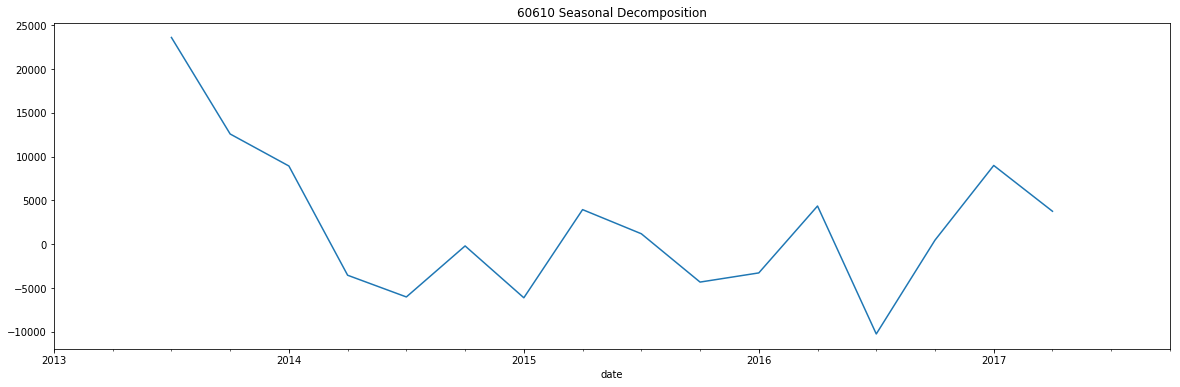

Test Statistic                 -3.687805
p-value                         0.004288
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


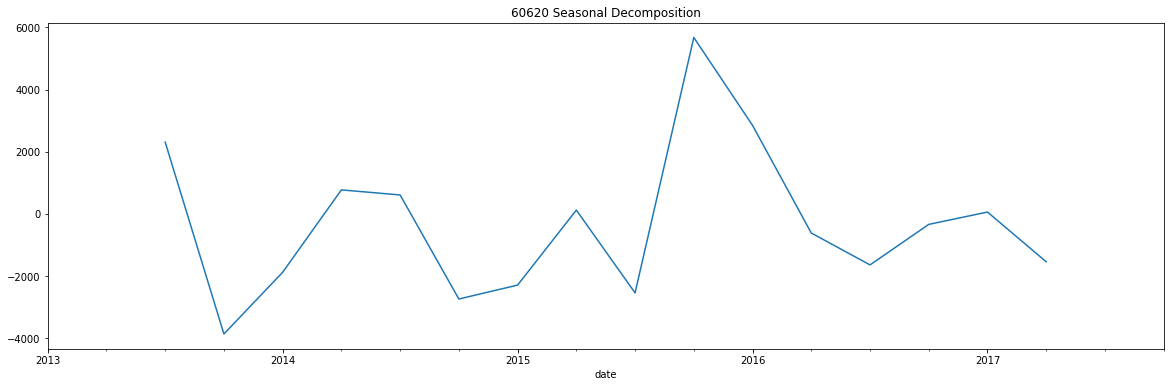

Test Statistic                 -3.685097
p-value                         0.004328
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


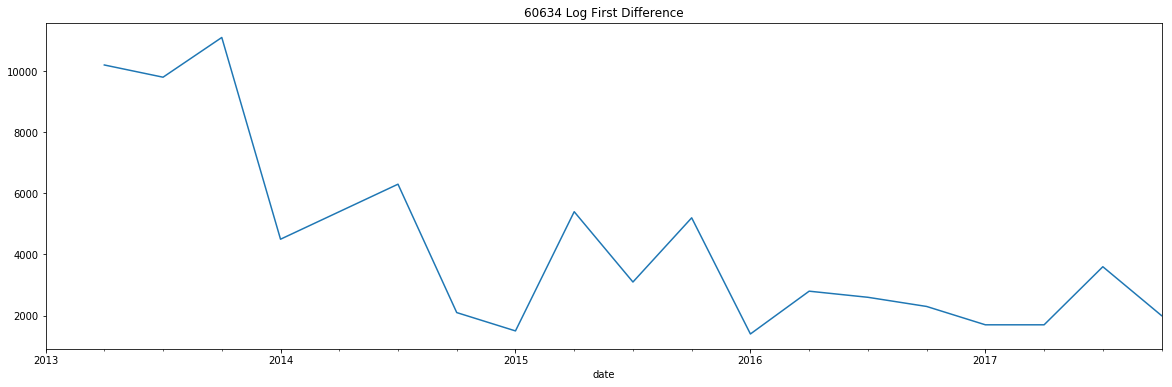

Test Statistic                -5.675116e+00
p-value                        8.740844e-07
#Lags Used                     2.000000e+00
Number of Observations Used    1.600000e+01
Critical Values (1%)          -3.924019e+00
Critical Values (5%)          -3.068498e+00
Critical Values (10%)         -2.673893e+00
dtype: float64


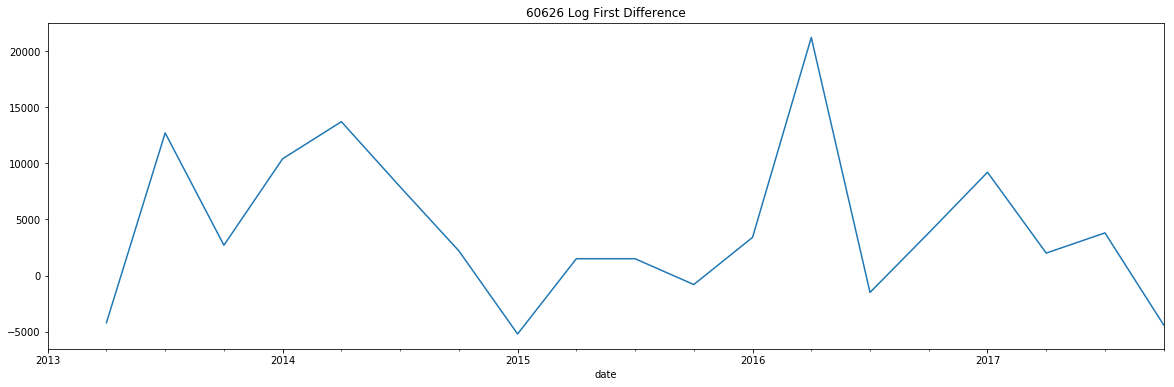

Test Statistic                 -4.313424
p-value                         0.000421
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


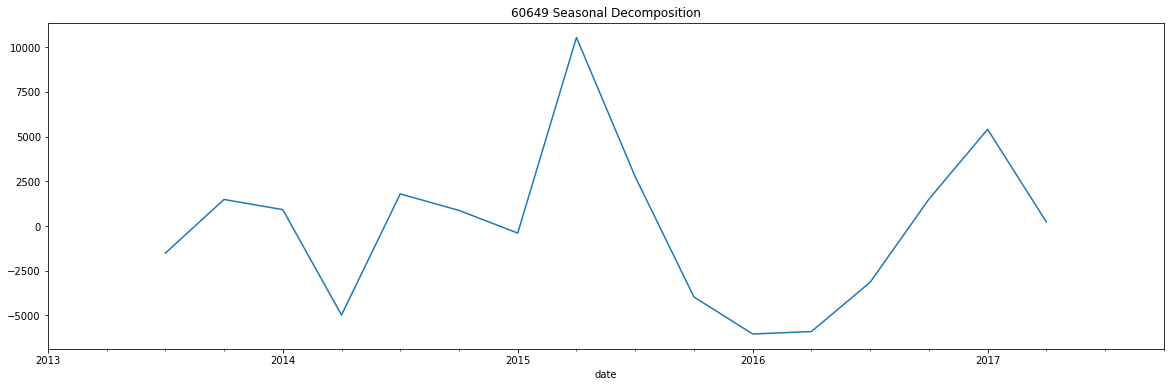

Test Statistic                 -3.405342
p-value                         0.010778
#Lags Used                      3.000000
Number of Observations Used    12.000000
Critical Values (1%)           -4.137829
Critical Values (5%)           -3.154972
Critical Values (10%)          -2.714477
dtype: float64


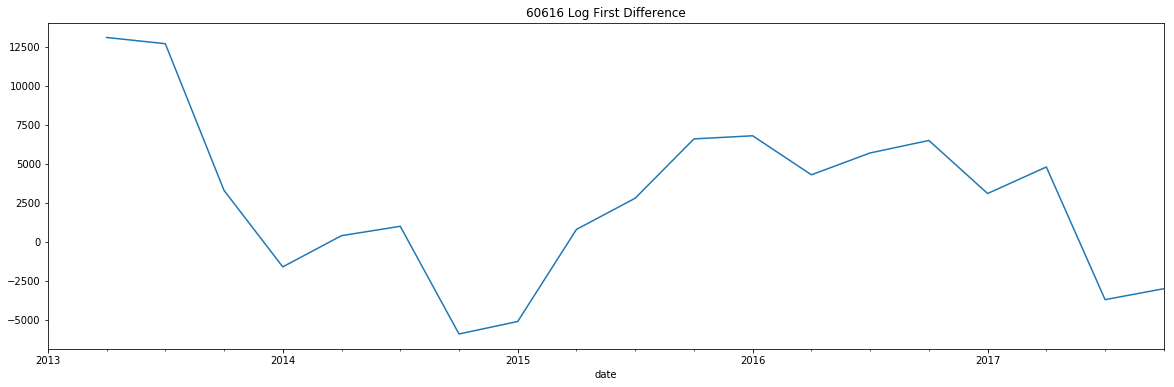

Test Statistic                 -2.423192
p-value                         0.135297
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


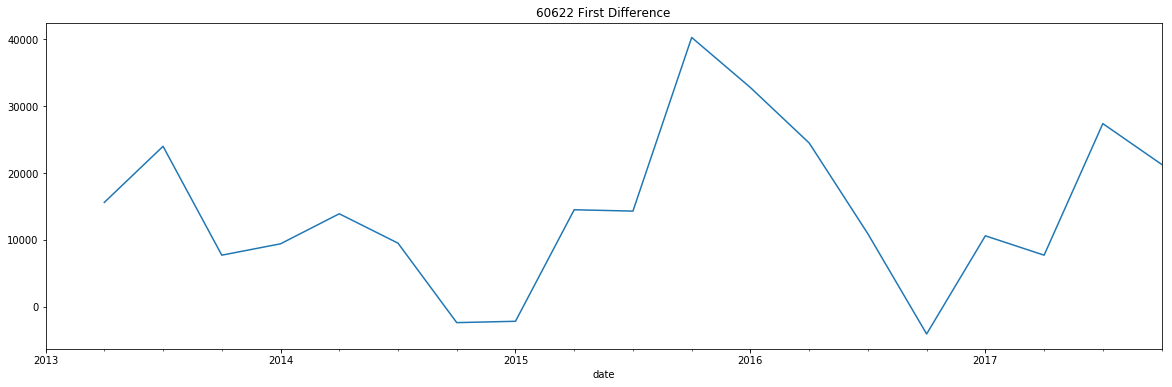

Test Statistic                 -3.300728
p-value                         0.014846
#Lags Used                      2.000000
Number of Observations Used    16.000000
Critical Values (1%)           -3.924019
Critical Values (5%)           -3.068498
Critical Values (10%)          -2.673893
dtype: float64


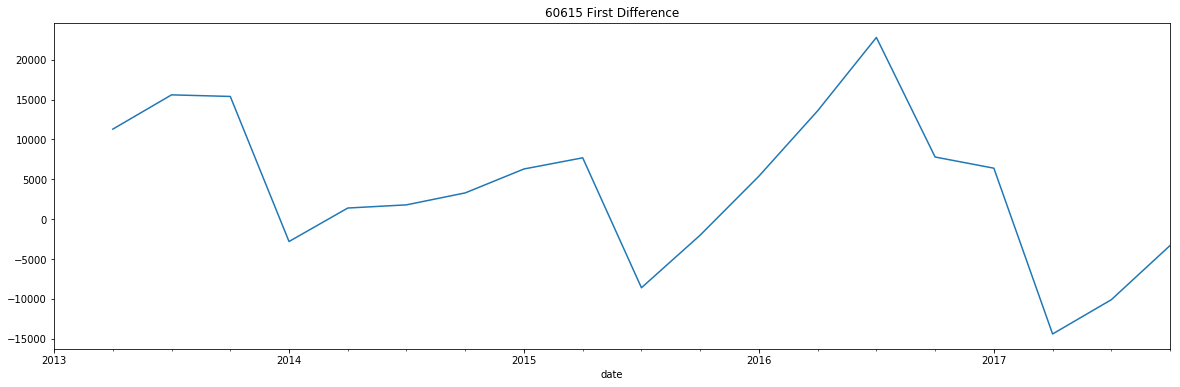

Test Statistic                 -4.022835
p-value                         0.001296
#Lags Used                      2.000000
Number of Observations Used    16.000000
Critical Values (1%)           -3.924019
Critical Values (5%)           -3.068498
Critical Values (10%)          -2.673893
dtype: float64


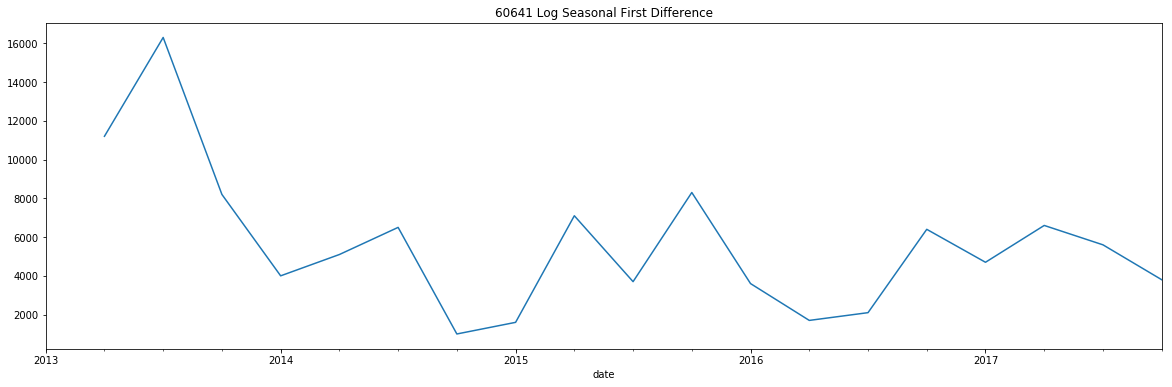

Test Statistic                -4.695956
p-value                        0.000086
#Lags Used                     1.000000
Number of Observations Used    5.000000
Critical Values (1%)          -6.045114
Critical Values (5%)          -3.929280
Critical Values (10%)         -2.986810
dtype: float64


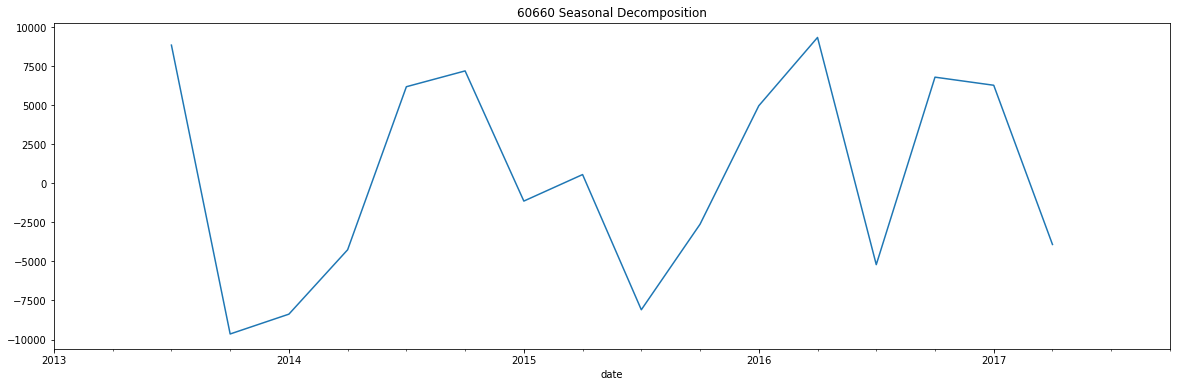

Test Statistic                 -3.622640
p-value                         0.005343
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


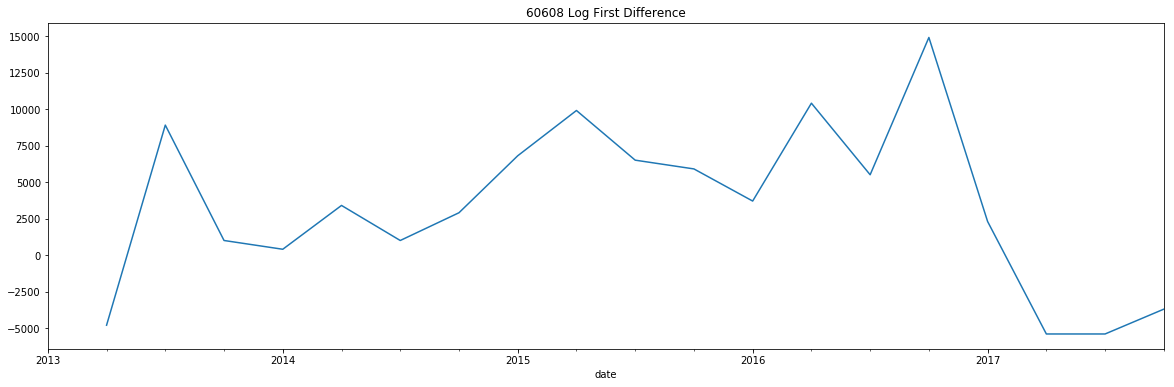

Test Statistic                 -3.351900
p-value                         0.012712
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


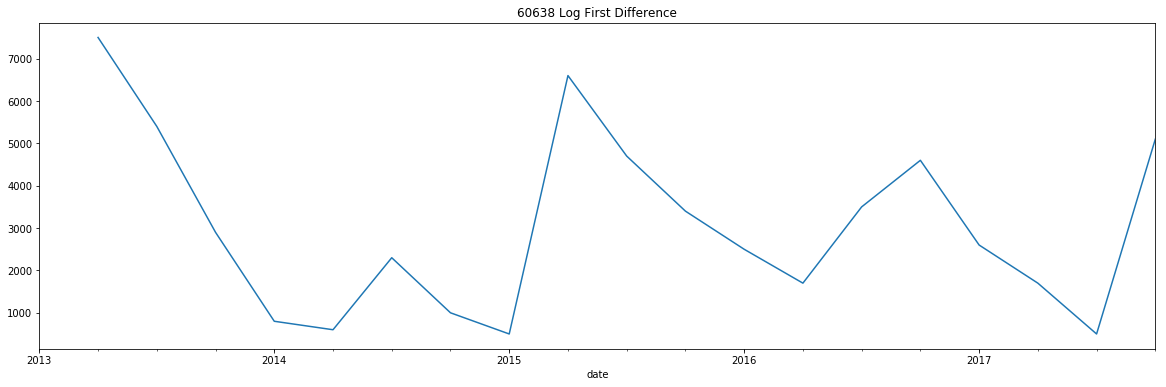

Test Statistic                 -3.706086
p-value                         0.004028
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


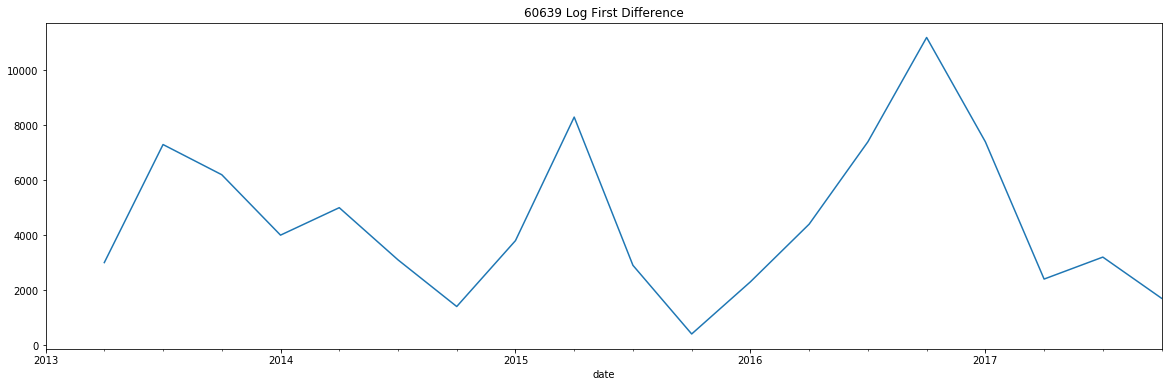

Test Statistic                 -3.496521
p-value                         0.008077
#Lags Used                      3.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


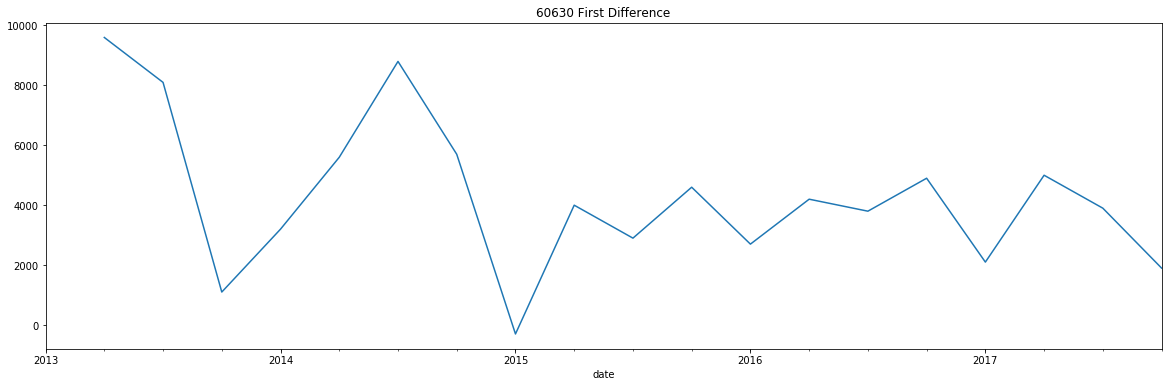

Test Statistic                 -3.937622
p-value                         0.001775
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


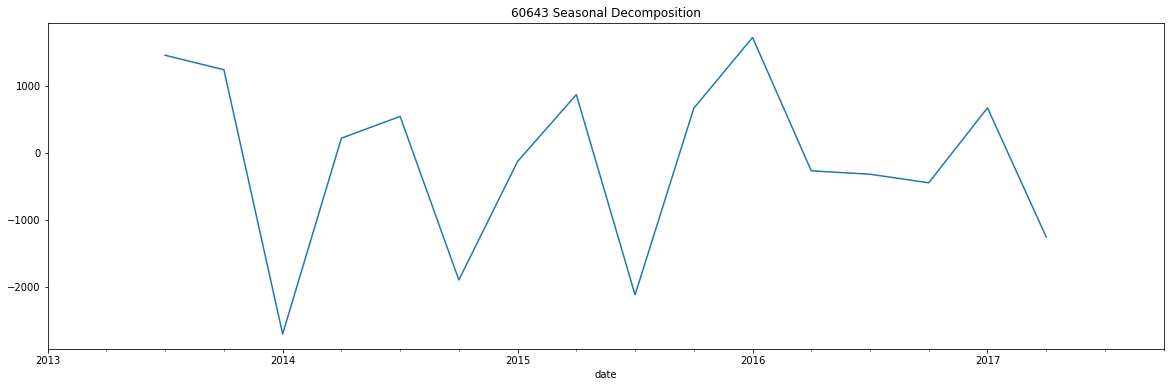

Test Statistic                -6.616718e+00
p-value                        6.180889e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.400000e+01
Critical Values (1%)          -4.012034e+00
Critical Values (5%)          -3.104184e+00
Critical Values (10%)         -2.690987e+00
dtype: float64


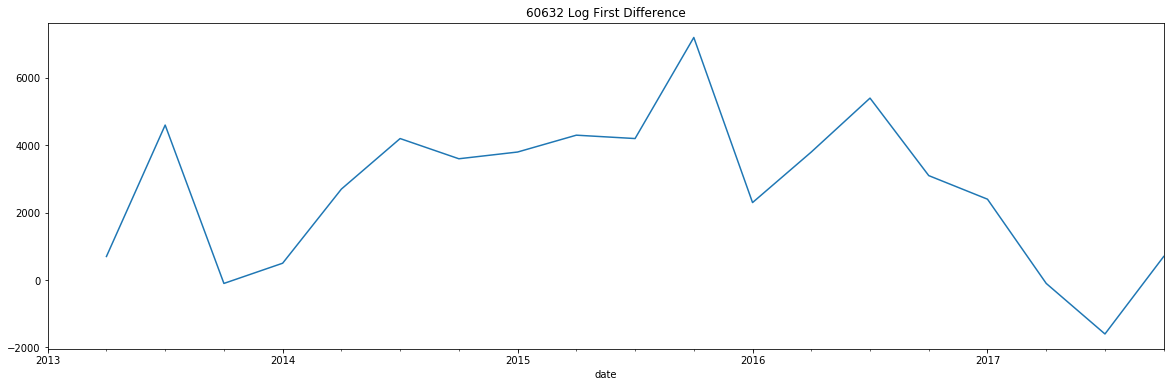

Test Statistic                 -2.802235
p-value                         0.057955
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


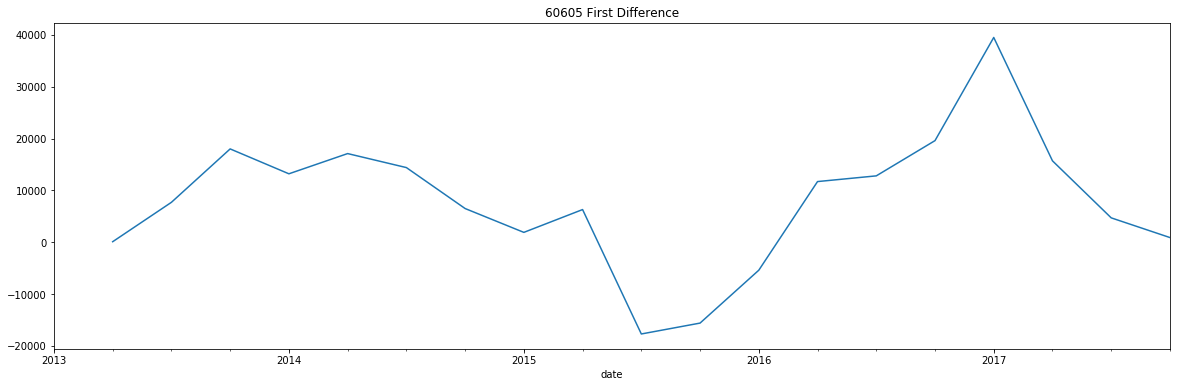

Test Statistic                 -4.007195
p-value                         0.001373
#Lags Used                      4.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


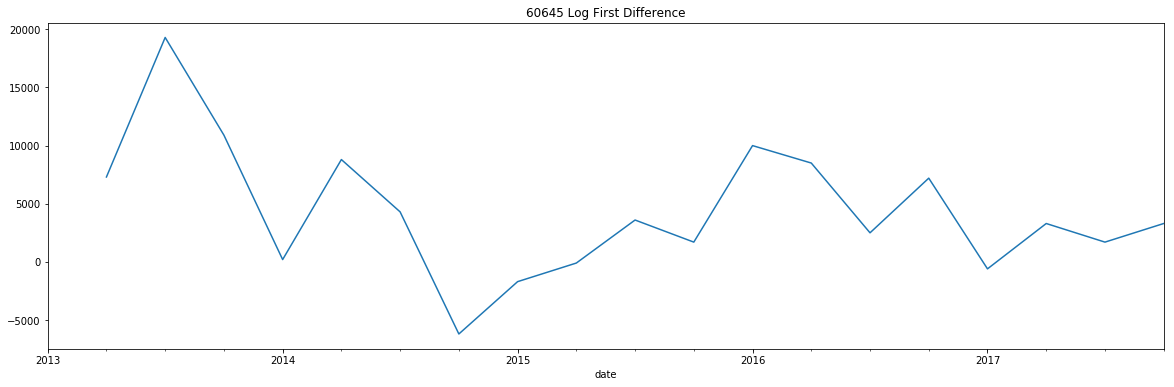

Test Statistic                 -3.567452
p-value                         0.006415
#Lags Used                      4.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


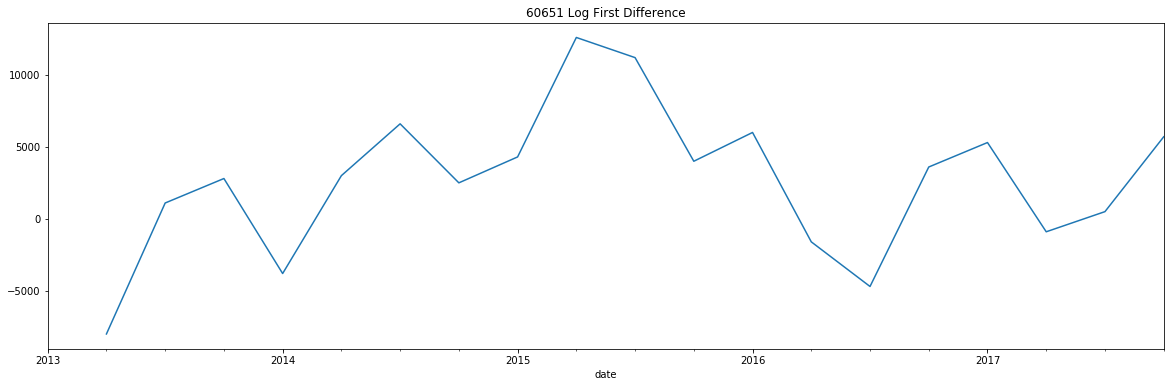

Test Statistic                 -2.702289
p-value                         0.073643
#Lags Used                      3.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


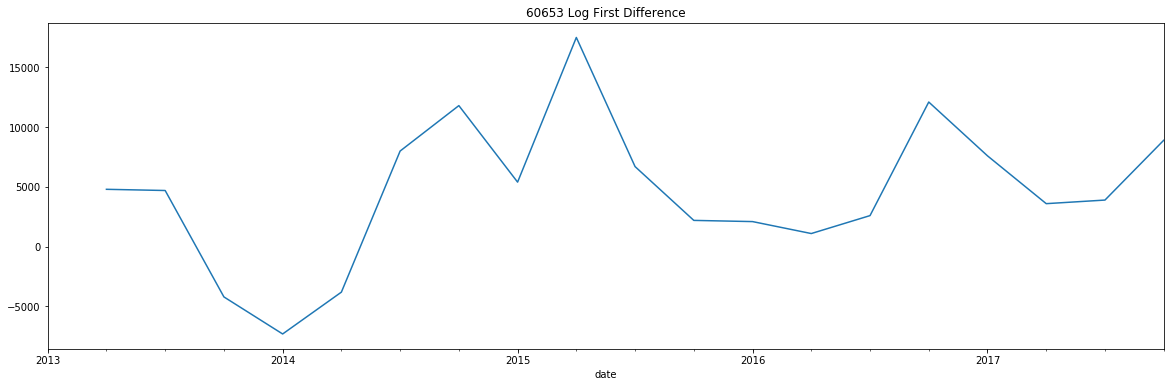

Test Statistic                 -4.685885
p-value                         0.000089
#Lags Used                      4.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


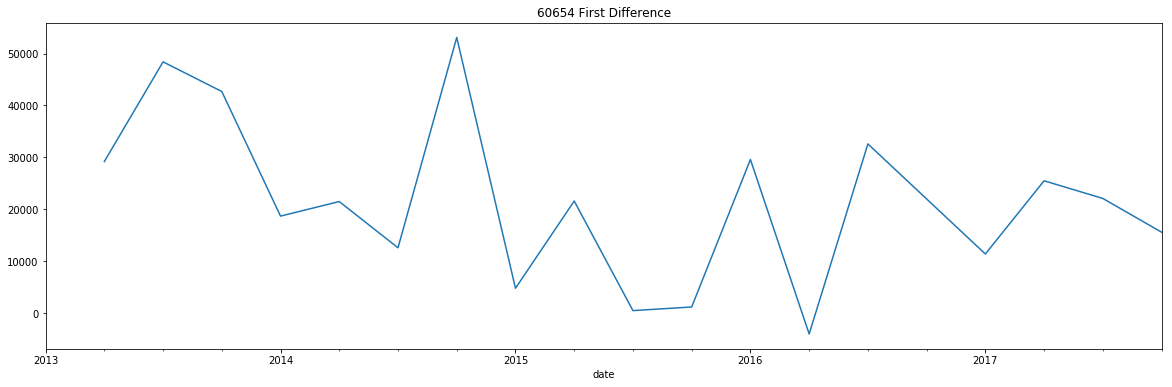

Test Statistic                 -4.354705
p-value                         0.000357
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


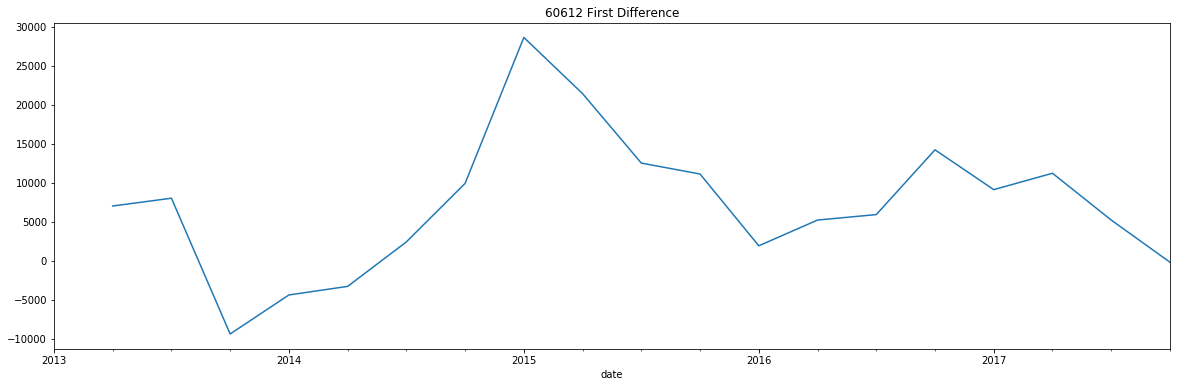

Test Statistic                 -3.274384
p-value                         0.016063
#Lags Used                      2.000000
Number of Observations Used    16.000000
Critical Values (1%)           -3.924019
Critical Values (5%)           -3.068498
Critical Values (10%)          -2.673893
dtype: float64


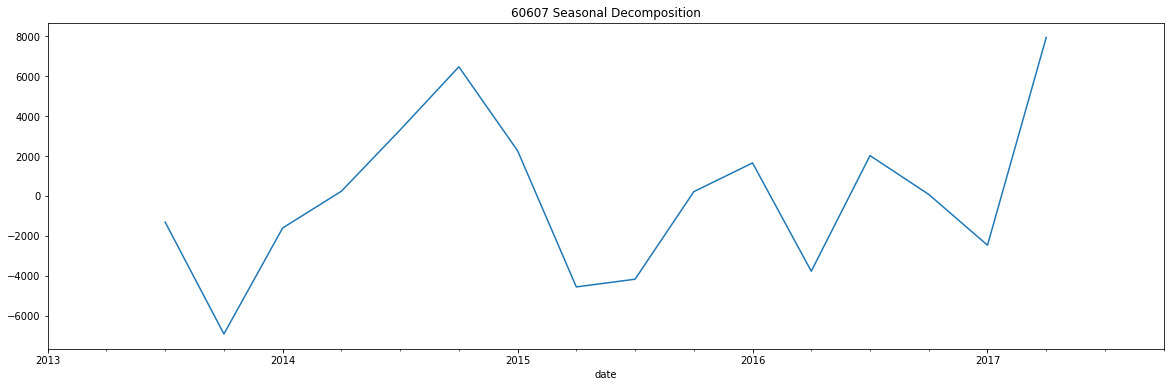

Test Statistic                 -3.255199
p-value                         0.017004
#Lags Used                      3.000000
Number of Observations Used    12.000000
Critical Values (1%)           -4.137829
Critical Values (5%)           -3.154972
Critical Values (10%)          -2.714477
dtype: float64


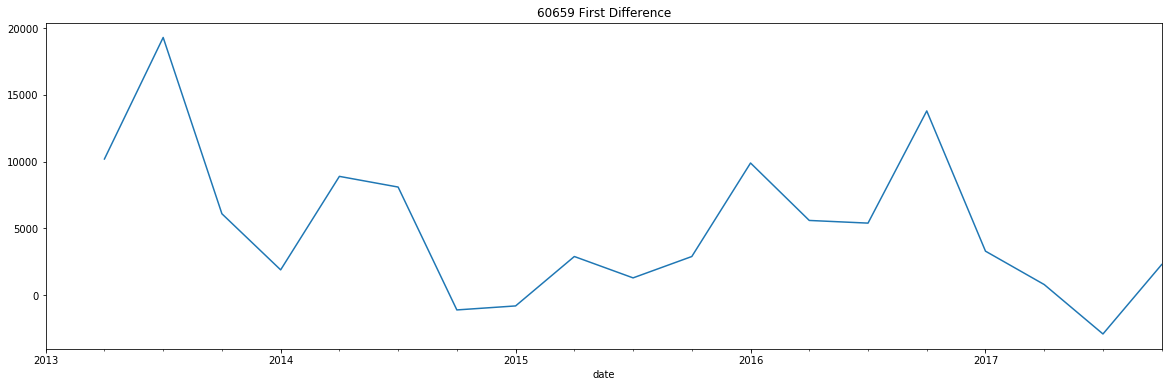

Test Statistic                 -2.922201
p-value                         0.042827
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Values (1%)           -3.859073
Critical Values (5%)           -3.042046
Critical Values (10%)          -2.660906
dtype: float64


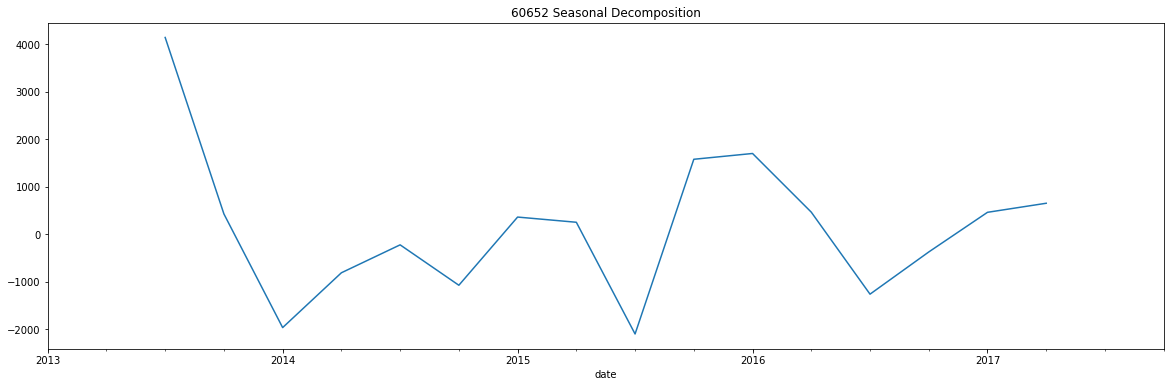

Test Statistic                 -4.477421
p-value                         0.000216
#Lags Used                      1.000000
Number of Observations Used    14.000000
Critical Values (1%)           -4.012034
Critical Values (5%)           -3.104184
Critical Values (10%)          -2.690987
dtype: float64


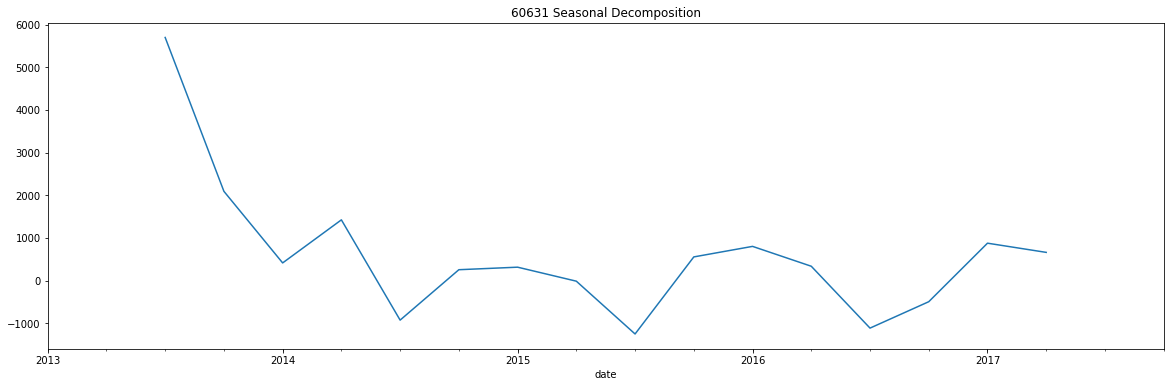

Test Statistic                -6.906052e+00
p-value                        1.246478e-09
#Lags Used                     3.000000e+00
Number of Observations Used    1.200000e+01
Critical Values (1%)          -4.137829e+00
Critical Values (5%)          -3.154972e+00
Critical Values (10%)         -2.714477e+00
dtype: float64


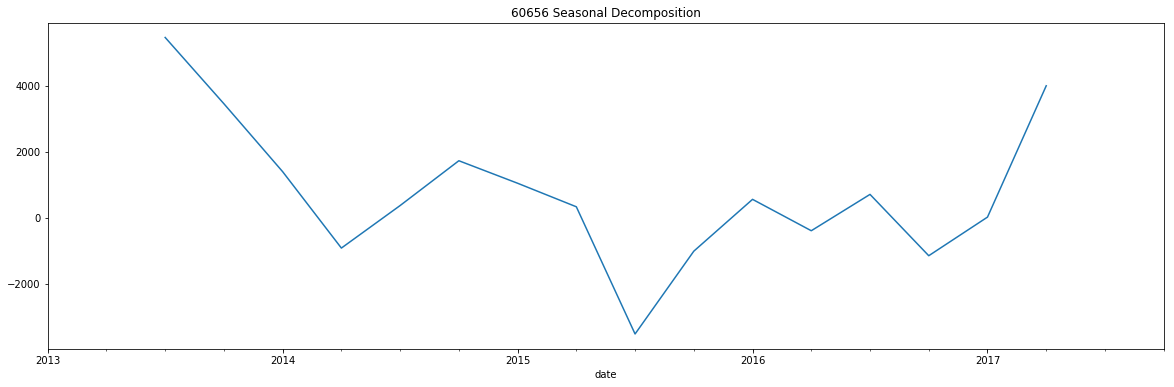

Test Statistic                 -2.822346
p-value                         0.055152
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


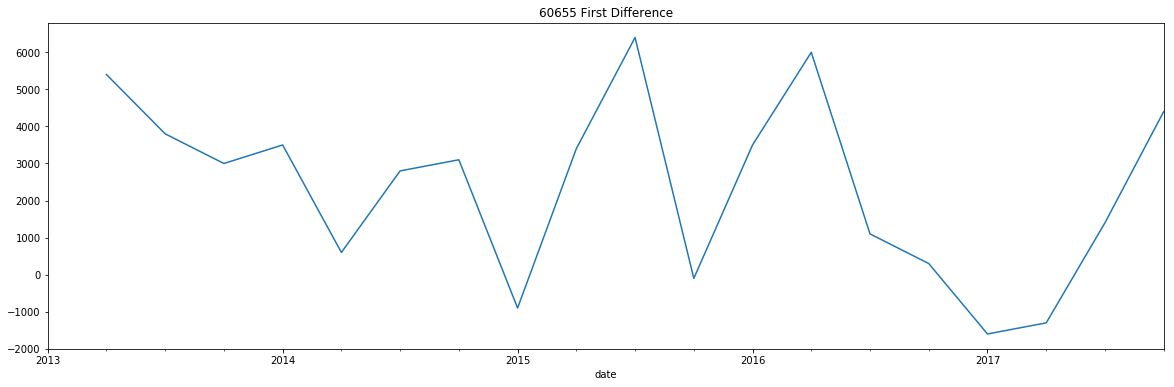

Test Statistic                 -2.937516
p-value                         0.041156
#Lags Used                      3.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


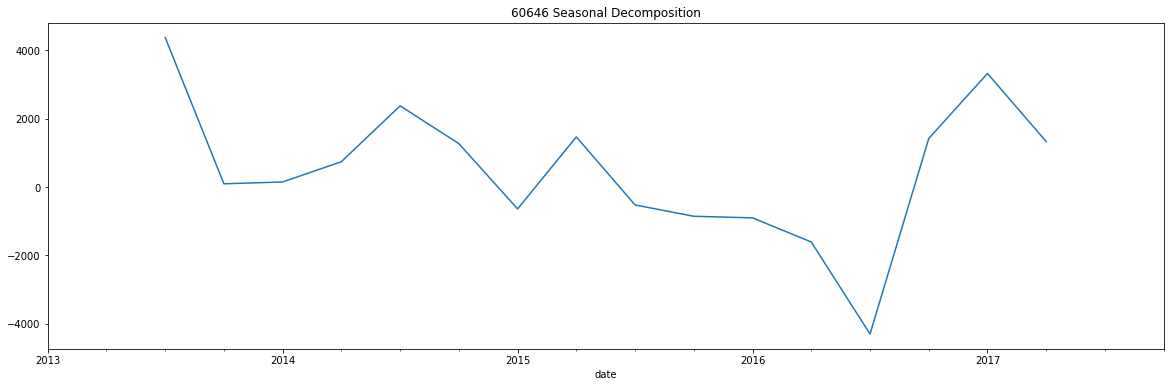

Test Statistic                 -3.337279
p-value                         0.013292
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


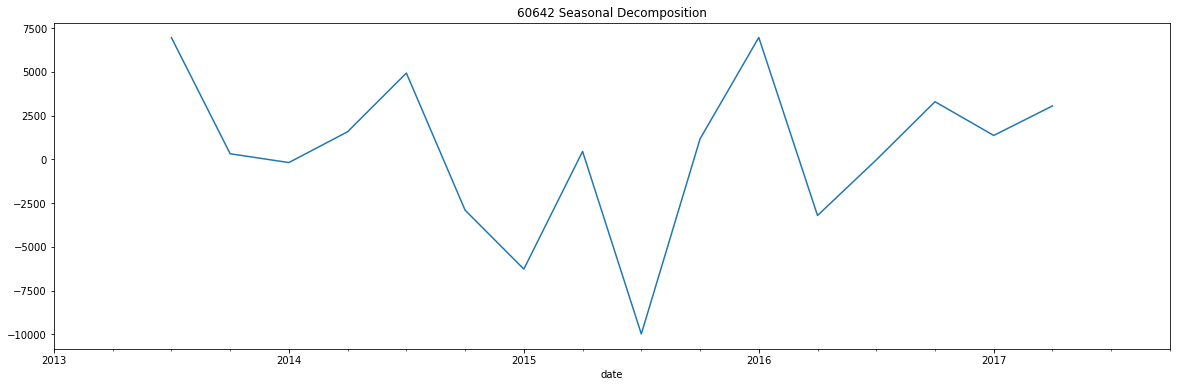

Test Statistic                 -4.011751
p-value                         0.001350
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Values (1%)           -3.964443
Critical Values (5%)           -3.084908
Critical Values (10%)          -2.681814
dtype: float64


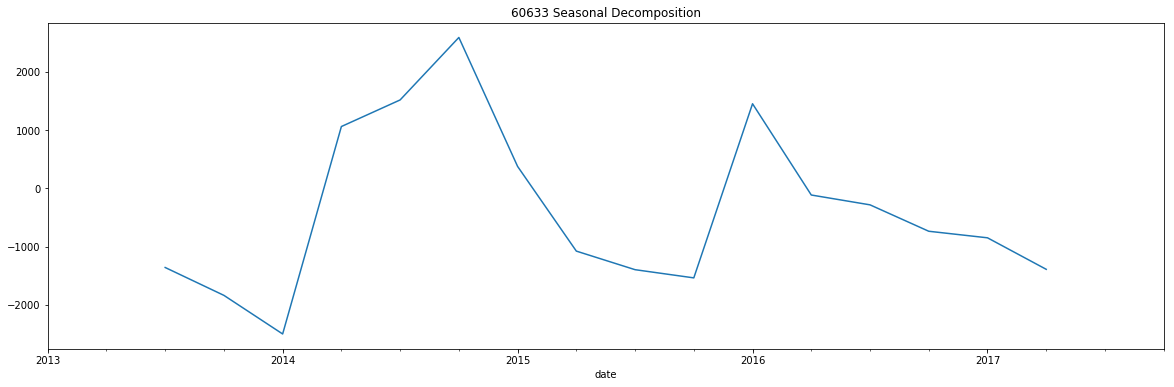

Test Statistic                 -4.794459
p-value                         0.000056
#Lags Used                      2.000000
Number of Observations Used    13.000000
Critical Values (1%)           -4.068854
Critical Values (5%)           -3.127149
Critical Values (10%)          -2.701730
dtype: float64

 The p-value above 0.1: 2


In [129]:
detrend(chicago_q,0.1)